# Data Wrangling Project


### Imported Libraries!

In [1]:
from __future__ import print_function
import pandas as pd # For data analysis
import numpy as np # For linear algebra

#import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Algorithims 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import pickle
import warnings
warnings.filterwarnings('ignore')

# Loading the data 

In [2]:
data = pd.read_csv('C:/Users/hp/OneDrive/OneCampus/DataWranglingClasses/Class_8_Prjct-Review/Muskets_teamData_V2.csv')

# EPLORATORY DATA ANALYSIS (EDA)

In [3]:
data.head() # Viewing the dataframe head

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595


In [4]:
data.shape # Viewing the number of rows and columns 

(19021, 77)

In [5]:
data.info() # To find columns and their dada types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19021 non-null  int64  
 1   Name              19021 non-null  object 
 2   LongName          19021 non-null  object 
 3   photoUrl          19021 non-null  object 
 4   playerUrl         19021 non-null  object 
 5   Nationality       19021 non-null  object 
 6   Age               19021 non-null  int64  
 7   ↓OVA              19019 non-null  float64
 8   POT               19020 non-null  float64
 9   Club              19021 non-null  object 
 10  Contract          19021 non-null  object 
 11  Positions         19021 non-null  object 
 12  Height            19021 non-null  object 
 13  Weight            19020 non-null  object 
 14  Preferred Foot    19021 non-null  object 
 15  BOV               19021 non-null  int64  
 16  Best Position     19021 non-null  object

In [6]:
data.columns # View of all columns 

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [7]:
# Renaming all the columns to avoid error calling some columns like: 'W/F', 'Loan Date End' etc

data.columns = ['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       'OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'pFoot', 'BOV', 'bPosition', 'Joined', 'loanED',
       'Value', 'Wage', 'rClause', 'Attacking', 'Crossing', 'Finishing',
       'hAccuracy', 'sPassing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK_Accuracy', 'lPassing', 'bControl', 'Movement',
       'Acceleration', 'sSpeed', 'Agility', 'Reactions', 'Balance',
       'Power', 'sPower', 'Jumping', 'Stamina', 'Strength', 'lShots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'sTackle',
       'SlidingT', 'Goalkeeping', 'GK_Diving', 'Gk_Handling',
       'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'T_Stats',
       'B_Stats', 'W_F', 'SM', 'A_W', 'D_W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits']

In [8]:
data.columns # To see if the column renaming took effect  

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       'OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'pFoot', 'BOV', 'bPosition', 'Joined', 'loanED', 'Value', 'Wage',
       'rClause', 'Attacking', 'Crossing', 'Finishing', 'hAccuracy',
       'sPassing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK_Accuracy',
       'lPassing', 'bControl', 'Movement', 'Acceleration', 'sSpeed', 'Agility',
       'Reactions', 'Balance', 'Power', 'sPower', 'Jumping', 'Stamina',
       'Strength', 'lShots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'sTackle', 'SlidingT', 'Goalkeeping', 'GK_Diving',
       'Gk_Handling', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'T_Stats',
       'B_Stats', 'W_F', 'SM', 'A_W', 'D_W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI',
       'DEF', 'PHY', 'Hits'],
      dtype='object')

In [9]:
data.dtypes # Column data types

ID             int64
Name          object
LongName      object
photoUrl      object
playerUrl     object
              ...   
PAS          float64
DRI          float64
DEF          float64
PHY          float64
Hits          object
Length: 77, dtype: object

In [10]:
data.isna().sum() # Checking for missing values in the entire dataset 

ID              0
Name            0
LongName        0
photoUrl        0
playerUrl       0
             ... 
PAS             5
DRI             2
DEF             5
PHY             1
Hits         2595
Length: 77, dtype: int64

## TASK 1: Conducting a full range cleaning of the data, Providing explanations and justifications for any actions taken. 

### **SUB TASK1: Extracting player name from the playerUrl column**


In [11]:
data.playerUrl.values[0:3] # Checking the playerUrl column components from the first three rows

array(['http://sofifa.com/player/158023/lionel-messi/210006/',
       'http://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210006/',
       'http://sofifa.com/player/200389/jan-oblak/210006/'], dtype=object)

In [12]:
data['playerUrl'].isna().sum() # Checking for missing values in the playerUrl column 

0

In [13]:
data.playerUrl.values[19019].split('/')[5] # Extracting the 5th (name) component of the payerUrl column at row 19019

'zhenao-wang'

In [14]:
# A for loop to split and extract only the name part of the playerUrl column

pNameList = []

for item in data.playerUrl.values:
    pName = item.split('/')[5]
    pName = pName.replace('-', ' ')
    pNameList.append(pName)
    

In [15]:
pNameList # Printing out the extracted names 

['lionel messi',
 'c ronaldo dos santos aveiro',
 'jan oblak',
 'kevin de bruyne',
 'neymar da silva santos jr',
 'robert lewandowski',
 'mohamed salah',
 'alisson ramses becker',
 'kylian mbappe',
 'marc andre ter stegen',
 'virgil van dijk',
 'sadio mane',
 'carlos henrique venancio casimiro',
 'thibaut courtois',
 'manuel neuer',
 'karim benzema',
 'sergio ramos garcia',
 'sergio aguero',
 'raheem sterling',
 'ngolo kante',
 'joshua kimmich',
 'paulo dybala',
 'ederson santana de moraes',
 'harry kane',
 'samir handanovic',
 'kalidou koulibaly',
 'eden hazard',
 'toni kroos',
 'antoine griezmann',
 'jadon sancho',
 'trent alexander arnold',
 'bernardo mota carvalho e silva',
 'andrew robertson',
 'aymeric laporte',
 'bruno miguel borges fernandes',
 'fabio henrique tavares',
 'heung min son',
 'roberto firmino barbosa de oliveira',
 'keylor navas',
 'giorgio chiellini',
 'sergio busquets burgos',
 'pierre emerick aubameyang',
 'wojciech szczesny',
 'angel di maria',
 'luka modric',


In [16]:
data['player_name'] = pNameList # Creating a new column named 'player_name' and adding the extracted names to it

In [17]:
data.head(2) # Checking the data frame to see if the new column has been creted sucessfully 

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,...,D_W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,player_name
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,lionel messi
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,c ronaldo dos santos aveiro


End of Sub Task 1

## Sub Task 2: Creating a new column titled Player Status from the CONTRACT column with 3 labels; 

### a. 'Active' If the player has an active contract

### b. 'Free', if the player is free

### c. 'On Loan' if the player is on loan

In [18]:
data.Contract.unique() # To find the unique values in the contract column 

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [19]:
# A for loop to extract player status 'free', 'on loan' and 'active' from the contract column 

pStatus = []

for item in data.Contract.values:
    if 'Free' in item:
        pStatus.append('Free')
    elif 'On Loan' in item:
        pStatus.append('On Loan')
    else:
        pStatus.append('Active')

In [20]:
pStatus # Viewing the player status list extracted from the contract column 

['Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',

In [21]:
data['player_status'] = pStatus # Creating the new column named 'player status' from the contract column 


In [22]:
data.head(2) # Checking that the new column is created successfully 

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,...,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,player_name,player_status
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,lionel messi,Active
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,c ronaldo dos santos aveiro,Active


In [23]:
data.loc[data['player_status'] == 'Free'] # A check for players who are 'Free' 

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,...,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,player_name,player_status
289,230347,Welington Dano,Welington Kauê Dano Nascimento,https://cdn.sofifa.com/players/230/347/21_60.png,http://sofifa.com/player/230347/welington-kaue...,Brazil,20,81.0,81.0,No Club,...,1 ★,79.0,54.0,76.0,78.0,75.0,74.0,172,welington kaue dano nascimento,Free
292,230225,Juiano Mestres,Juan Everton Mestres de Mesquita,https://cdn.sofifa.com/players/230/225/21_60.png,http://sofifa.com/player/230225/juan-everton-m...,Brazil,24,81.0,81.0,No Club,...,1 ★,71.0,61.0,57.0,62.0,82.0,80.0,75,juan everton mestres de mesquita,Free
369,245299,J. Frendado,Jaime Nicolás Frendado,https://cdn.sofifa.com/players/245/299/21_60.png,http://sofifa.com/player/245299/jaime-nicolas-...,Uruguay,36,80.0,80.0,No Club,...,1 ★,71.0,61.0,57.0,62.0,82.0,75.0,11,jaime nicolas frendado,Free
374,245294,J. Serendero,Jorge Ezequiel Serendero,https://cdn.sofifa.com/players/245/294/21_60.png,http://sofifa.com/player/245294/jorge-ezequiel...,Uruguay,32,80.0,80.0,No Club,...,1 ★,78.0,81.0,77.0,77.0,42.0,80.0,18,jorge ezequiel serendero,Free
375,245308,M. Nérez,Mauro Evidio Nérez,https://cdn.sofifa.com/players/245/308/21_60.png,http://sofifa.com/player/245308/mauro-evidio-n...,Uruguay,32,80.0,80.0,No Club,...,1 ★,79.0,54.0,75.0,78.0,76.0,74.0,17,mauro evidio nerez,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17262,247059,A. Al Hidhani,Ali Al Hidhani,https://cdn.sofifa.com/players/247/059/21_60.png,http://sofifa.com/player/247059/ali-al-hidhani...,United Arab Emirates,22,56.0,64.0,No Club,...,1 ★,73.0,33.0,45.0,55.0,51.0,55.0,NaN,ali al hidhani,Free
17385,251734,A. Sanghu,Anudaan Sanghu,https://cdn.sofifa.com/players/251/734/21_60.png,http://sofifa.com/player/251734/anudaan-sanghu...,India,20,56.0,56.0,No Club,...,1 ★,79.0,42.0,50.0,59.0,29.0,49.0,NaN,anudaan sanghu,Free
17701,251738,M. Chada,Madanapal Chada,https://cdn.sofifa.com/players/251/738/21_60.png,http://sofifa.com/player/251738/madanapal-chad...,India,27,55.0,55.0,No Club,...,1 ★,67.0,52.0,47.0,61.0,32.0,57.0,NaN,madanapal chada,Free
17703,251741,E. Suresh,Eelamynthan Suresh,https://cdn.sofifa.com/players/251/741/21_60.png,http://sofifa.com/player/251741/eelamynthan-su...,India,28,55.0,55.0,No Club,...,1 ★,73.0,49.0,51.0,54.0,41.0,70.0,NaN,eelamynthan suresh,Free


End of sub task 2

### Sub Task 3: Unpacking the POSITIONS column into as many columns as there are positions and assigning Boolean values in the columns for each player as appropriate. Naming the columns the play position.

In [24]:
data.Positions # Accessing values in the positions column 

0        RW, ST, CF
1            ST, LW
2                GK
3           CAM, CM
4           LW, CAM
            ...    
19016            CB
19017            CM
19018            CM
19019            RW
19020        CB, LB
Name: Positions, Length: 19021, dtype: object

In [25]:
data.Positions.unique() # Accessing the unique values 

array(['RW, ST, CF', 'ST, LW', 'GK', 'CAM, CM', 'LW, CAM', 'ST', 'RW',
       'ST, LW, RW', 'CB', 'LW', 'CDM', 'CF, ST', 'LW, RW', 'CDM, CM',
       'CDM, RB', 'CF, CAM', 'LW, ST', 'CM', 'ST, CF, LW', 'RM, LM, CAM',
       'RB', 'RW, CAM, CM', 'LB', 'LM, CF', 'CF', 'RW, LW', 'CAM, RM, RW',
       'CM, CDM', 'CAM, CF, ST', 'CM, CDM, CAM', 'CF, LW, CAM',
       'CAM, RM, CF', 'LM, ST', 'RM, LM, RW', 'LM', 'CAM, RW', 'CB, CDM',
       'RW, RM', 'LW, CF', 'CM, RM, LM', 'LB, LM', 'CAM, CM, RM',
       'CAM, CM, CF', 'CAM, CF', 'LM, RM, LW', 'LM, LB, CM', 'CM, LM, LB',
       'RM, RW', 'RM, CM', 'CAM, CM, LW', 'CB, LB', 'RM, RB', 'ST, RW',
       'LM, RW, LW', 'RB, LB', 'RB, RM', 'RM', 'LM, RM, CF', 'CAM, RM',
       'RB, RWB', 'CDM, CB, CM', 'CAM, RM, ST', 'LM, LW, RM', 'CM, CAM',
       'ST, RM, CF', 'LM, RM', 'RM, CF', 'LM, LWB', 'RW, RM, CF',
       'RB, CM', 'LW, CAM, RW', 'CAM, LW, CM', 'CM, CAM, CDM',
       'RW, LW, CAM', 'CM, CAM, LM', 'CM, RM, ST', 'CDM, CM, RB',
       'ST, CAM', 

In [26]:
pList = []

# A loop to unpack the positions column
for val in data.Positions:
    if ',' in val: # If comma exists in string it means player plays multiple positions
        List = val.split(',') # Splitting the player positions using comma
        playerPos = [x.strip() for x in List] # Removing leading and trailing white spaces 
        pList.extend(playerPos)

    else:
        val.strip()
        pList.append(val)

In [27]:
pList # Viewing the various positions unpacked 

['RW',
 'ST',
 'CF',
 'ST',
 'LW',
 'GK',
 'CAM',
 'CM',
 'LW',
 'CAM',
 'ST',
 'RW',
 'GK',
 'ST',
 'LW',
 'RW',
 'GK',
 'CB',
 'LW',
 'CDM',
 'GK',
 'GK',
 'CF',
 'ST',
 'CB',
 'ST',
 'LW',
 'RW',
 'CDM',
 'CM',
 'CDM',
 'RB',
 'CF',
 'CAM',
 'GK',
 'ST',
 'GK',
 'CB',
 'LW',
 'ST',
 'CM',
 'ST',
 'CF',
 'LW',
 'RM',
 'LM',
 'CAM',
 'RB',
 'RW',
 'CAM',
 'CM',
 'LB',
 'CB',
 'CAM',
 'CM',
 'CDM',
 'LM',
 'CF',
 'CF',
 'GK',
 'CB',
 'CDM',
 'CM',
 'ST',
 'LW',
 'GK',
 'RW',
 'LW',
 'CM',
 'ST',
 'GK',
 'ST',
 'CAM',
 'RM',
 'RW',
 'GK',
 'RB',
 'CB',
 'CM',
 'CDM',
 'CM',
 'CDM',
 'ST',
 'CB',
 'CB',
 'GK',
 'CAM',
 'CM',
 'CAM',
 'CF',
 'ST',
 'LB',
 'CDM',
 'CM',
 'CDM',
 'CM',
 'CM',
 'CDM',
 'CAM',
 'CF',
 'LW',
 'CAM',
 'CAM',
 'RM',
 'CF',
 'CB',
 'CB',
 'LM',
 'ST',
 'GK',
 'RM',
 'LM',
 'RW',
 'LM',
 'CAM',
 'RW',
 'CB',
 'CB',
 'CDM',
 'RW',
 'RM',
 'RB',
 'ST',
 'LW',
 'CM',
 'ST',
 'CM',
 'LW',
 'CF',
 'CB',
 'CB',
 'CM',
 'RM',
 'LM',
 'GK',
 'ST',
 'LB',
 'LM',
 'CM',
 'C

In [28]:
p_pos = list(set(pList)) # Applying set to avoid having duplicates

In [29]:
p_pos # Positions without repeatitions 

['CF',
 'LW',
 'RM',
 'LB',
 'ST',
 'CDM',
 'CB',
 'CM',
 'LM',
 'LWB',
 'RW',
 'CAM',
 'GK',
 'RWB',
 'RB']

In [30]:
play_pos = [] # Storage container 

# A for loop place the various positions appropriately  
for positions in data.Positions.values:
    pTable = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
            # ['no','no','no','no','no','no','no','no','no','no','no','no','no','no','no']
    for p in p_pos:
        if p in positions:
            p_id = p_pos.index(p)
            pTable[p_id] = 1 # Or a categorical value like 'yes'
    play_pos.append(pTable) 

In [31]:
play_pos # View of positions 

[[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [32]:
data2 = pd.DataFrame(play_pos, columns = p_pos) # converting the postions list to a dataframe

In [33]:
data2.head(2) # Viewing the first two rows of the play posistions created 

,CF,LW,RM,LB,ST,CDM,CB,CM,LM,LWB,RW,CAM,GK,RWB,RB
0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [34]:
data.Positions.values[0:5]

array(['RW, ST, CF', 'ST, LW', 'GK', 'CAM, CM', 'LW, CAM'], dtype=object)

In [35]:
data = data.join(data2) # Merging play positions table to the original dataframe

In [36]:
data.head(2)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,...,CDM,CB,CM,LM,LWB,RW,CAM,GK,RWB,RB
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,0,0,0,0,1,0,0,0,0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data.values[0]

array([158023, 'L. Messi', 'Lionel Messi',
       'https://cdn.sofifa.com/players/158/023/21_60.png',
       'http://sofifa.com/player/158023/lionel-messi/210006/',
       'Argentina', 33, 93.0, 93.0, '\n\n\n\nFC Barcelona', '2004 ~ 2021',
       'RW, ST, CF', '170cm', '72kg', 'Left', 93, 'RW', '1-Jul-04', nan,
       '€103.5M', '€560K', '€138.4M', 429.0, 85.0, 95.0, 70.0, '91', 88.0,
       470.0, '96', 93.0, 94.0, 91.0, 96.0, 451.0, 91.0, 80.0, 91.0, 94.0,
       95.0, 389.0, 86.0, 68.0, 72.0, 69.0, 94.0, 347.0, 44, 40.0, 93.0,
       95, 75.0, 96.0, 91.0, 32.0, 35.0, 24.0, 54.0, 6.0, 11.0, 15.0,
       14.0, 8, 2231.0, 466, '4 ★', '4★', 'Medium', 'Low', '5 ★', 85.0,
       92.0, 91.0, 95.0, 38.0, 65.0, '771', 'lionel messi', 'Active', 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=object)

End of sub task 3

## Sub Task 4: Converting Weight and Height, W/F, SM and IR Columns to integers

## The Weight Column

In [38]:
data.Weight.unique() #Checking for unique values in the weight column 

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       nan, '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs',
       '185lbs', '170lbs', '203lbs', '168lbs', '161lbs', '146lbs',
       '130lbs', '190lbs', '174lbs', '148lbs', '165lbs', '159lbs',
       '192lbs', '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg',
       '103kg', '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg',
       '107kg', '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [39]:
data.Weight.isna().sum()

1

In [40]:
w_List = [] # A container storing 'kg' values

for val in data.Weight.values:
    val = str(val) # Converting weight values to string 
    if 'kg' in val: # Checking for kg in each value 
        w_List.append(float(val[:-2])) # Removing the kg unit and saving only its values   
    elif 'lbs'in val: # Checking for lbs in each value 
        w_List.append(float(val[:-3])*0.453592) # converting lbs to kg, and saving values without the lbs unit
    else:
        w_List.append(float(0)) # Keeping the missing values 

In [41]:
w_List

[72.0,
 83.0,
 87.0,
 70.0,
 68.0,
 80.0,
 71.0,
 91.0,
 73.0,
 85.0,
 92.0,
 69.0,
 84.0,
 96.0,
 92.0,
 81.0,
 82.0,
 70.0,
 69.0,
 70.0,
 73.0,
 75.0,
 86.0,
 89.0,
 92.0,
 89.0,
 74.0,
 76.0,
 73.0,
 76.0,
 69.0,
 64.0,
 64.0,
 85.0,
 69.0,
 78.0,
 78.0,
 76.0,
 80.0,
 85.0,
 76.0,
 80.0,
 90.0,
 69.0,
 66.0,
 83.0,
 82.0,
 85.0,
 75.0,
 82.0,
 73.0,
 81.0,
 60.0,
 84.0,
 74.0,
 85.0,
 94.0,
 79.0,
 67.0,
 68.0,
 68.0,
 80.0,
 82.0,
 76.0,
 78.0,
 83.0,
 89.0,
 80.0,
 70.0,
 90.0,
 75.0,
 75.0,
 65.0,
 81.0,
 75.0,
 67.0,
 70.0,
 76.0,
 74.0,
 75.0,
 74.0,
 59.0,
 81.0,
 79.0,
 75.0,
 82.0,
 94.0,
 80.0,
 70.0,
 70.0,
 76.0,
 86.0,
 85.0,
 61.0,
 74.0,
 78.0,
 69.0,
 72.0,
 71.0,
 74.0,
 79.0,
 93.0,
 83.0,
 79.0,
 81.0,
 88.0,
 71.0,
 75.0,
 69.0,
 73.0,
 97.0,
 71.0,
 76.0,
 84.0,
 76.0,
 75.0,
 77.0,
 68.0,
 65.0,
 81.0,
 68.0,
 74.0,
 85.0,
 79.0,
 73.0,
 72.0,
 79.0,
 78.0,
 66.0,
 62.0,
 67.0,
 70.0,
 78.0,
 67.0,
 78.0,
 77.0,
 80.0,
 89.0,
 81.0,
 84.0,
 77.0,
 60.0,
 73.0,

In [42]:
data['wgt'] = w_List

In [43]:
data.wgt

0        72.0
1        83.0
2        87.0
3        70.0
4        68.0
         ... 
19016    66.0
19017    65.0
19018    74.0
19019    69.0
19020    75.0
Name: wgt, Length: 19021, dtype: float64

In [44]:
data.head(2)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,...,CB,CM,LM,LWB,RW,CAM,GK,RWB,RB,wgt
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,0,0,0,1,0,0,0,0,72.0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,0,0,0,0,0,0,0,0,83.0


## The Height Column 

In [45]:
data.Height.unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [46]:
no_CM_List = [] # Storing values without the cm unit 

for val in data.Height:
    if 'cm' not in val: # Checking for values without cm unit
        no_CM_List.append(val) # Extracting the values without the cm unit 
        
no_CM = list(set(no_CM_List))
print(no_CM) # Unique values without the cm unit 

['6\'1"', '6\'0"', '5\'6"', '5\'9"', '6\'4"', '5\'11"', '6\'3"', '5\'10"', '5\'7"', '6\'5"', '5\'4"', '6\'2"']


In [47]:
# For loop to remove the cm character and convert values in feets, inches to cm

h_List = []

for val in data.Height.values:
    val = str(val)
    if 'cm' in val:
        ht = float(val[:-2])
        h_List.append(ht)
    elif val in no_CM:
        ft = val[0]
        inch = val[-2]
        
        ht2 = float(ft)*30.48 + float(inch)*2.54 # converting to cm
        h_List.append(ht2)
    else:
        h_List.append(val)

In [48]:
h_List # View of extracted values 

[170.0,
 187.0,
 188.0,
 181.0,
 175.0,
 184.0,
 175.0,
 191.0,
 178.0,
 187.0,
 193.0,
 175.0,
 185.0,
 199.0,
 193.0,
 185.0,
 184.0,
 173.0,
 170.0,
 168.0,
 176.0,
 177.0,
 188.0,
 188.0,
 193.0,
 187.0,
 175.0,
 183.0,
 176.0,
 180.0,
 180.0,
 173.0,
 178.0,
 189.0,
 179.0,
 188.0,
 183.0,
 181.0,
 185.0,
 187.0,
 189.0,
 187.0,
 195.0,
 180.0,
 172.0,
 182.0,
 188.0,
 185.0,
 186.0,
 192.0,
 173.0,
 191.0,
 165.0,
 191.0,
 179.0,
 194.0,
 191.0,
 183.0,
 173.0,
 167.0,
 170.0,
 182.0,
 191.0,
 191.0,
 176.0,
 188.0,
 189.0,
 188.0,
 186.0,
 196.0,
 175.0,
 184.0,
 181.0,
 186.0,
 183.0,
 179.0,
 175.0,
 180.0,
 182.0,
 181.0,
 180.0,
 163.0,
 186.0,
 183.0,
 176.0,
 190.0,
 191.0,
 180.0,
 174.0,
 183.0,
 181.0,
 191.0,
 190.0,
 169.0,
 183.0,
 187.0,
 175.0,
 178.0,
 180.0,
 183.0,
 185.0,
 190.0,
 185.0,
 181.0,
 174.0,
 194.0,
 181.0,
 179.0,
 171.0,
 171.0,
 195.0,
 170.0,
 184.0,
 190.0,
 189.0,
 184.0,
 185.0,
 170.0,
 172.0,
 188.0,
 181.0,
 178.0,
 187.0,
 190.0,
 178.0,


In [49]:
data['hgt'] = h_List

In [50]:
data.hgt

0        170.0
1        187.0
2        188.0
3        181.0
4        175.0
         ...  
19016    178.0
19017    175.0
19018    179.0
19019    175.0
19020    188.0
Name: hgt, Length: 19021, dtype: float64

In [51]:
data.head(2)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,...,CM,LM,LWB,RW,CAM,GK,RWB,RB,wgt,hgt
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,0,0,1,0,0,0,0,72.0,170.0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,0,0,0,0,0,0,0,83.0,187.0


## The 'W_F', SM and IR columns: 

In [52]:
starCols = []
for x, y, z in zip(data['W_F'].values, data['SM'].values, data['IR'].values):
    
    starCols.append([x[0], y[0], z[0]])
pd.DataFrame(starCols, columns=['W_F', 'SM', 'IR'])

,W_F,SM,IR
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5
...,...,...,...
19016,2,2,1
19017,2,2,1
19018,2,2,1
19019,3,2,1


In [53]:
# Joining the new dataframes to the original dataframe 

star_DF = pd.DataFrame(starCols, columns=['W_F1', 'SM1', 'IR1'])
data = data.join(star_DF) 

In [54]:
# Converting the columns to integer data type as demanded by the question 

columns_to_change = ['wgt', 'hgt', 'W_F1', 'SM1', 'IR1'] # Conversion from object data type to integer data type
data[columns_to_change] = data[columns_to_change].astype(int)

In [55]:
data.head(2)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,...,RW,CAM,GK,RWB,RB,wgt,hgt,W_F1,SM1,IR1
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,1,0,0,0,0,72,170,4,4,5
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,0,0,0,0,83,187,4,5,5


In [56]:
data.info() # Checking columns an their respective data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 99 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              19021 non-null  int64  
 1   Name            19021 non-null  object 
 2   LongName        19021 non-null  object 
 3   photoUrl        19021 non-null  object 
 4   playerUrl       19021 non-null  object 
 5   Nationality     19021 non-null  object 
 6   Age             19021 non-null  int64  
 7   OVA             19019 non-null  float64
 8   POT             19020 non-null  float64
 9   Club            19021 non-null  object 
 10  Contract        19021 non-null  object 
 11  Positions       19021 non-null  object 
 12  Height          19021 non-null  object 
 13  Weight          19020 non-null  object 
 14  pFoot           19021 non-null  object 
 15  BOV             19021 non-null  int64  
 16  bPosition       19021 non-null  object 
 17  Joined          19021 non-null 

### End of sub task 4

## SUB TASK 5: Converting Value, Wage and Release Clause columns to Float data type

### The Value Column 

In [57]:
data.Value.unique()

array(['€103.5M', '€63M', '€120M', '€129M', '€132M', '€111M', '€120.5M',
       '€102M', '€185.5M', '€110M', '€113M', '€90.5M', '€82M', '€17.5M',
       '€83.5M', '€33.5M', '€114.5M', '€78M', '€103M', '€109M', '€92M',
       '€10M', '€76.5M', '€89.5M', '€87.5M', '€79.5M', '€124M', '€114M',
       '€95M', '€92.5M', '€105.5M', '€88.5M', '€85M', '€81.5M', '€26M',
       '€21M', '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€65.5M',
       '€46.5M', '€61.5M', '€72.5M', '€77.5M', '€43.5M', '€32.5M', '€36M',
       '€32M', '€54M', '€49.5M', '€57M', '€66.5M', '€74.5M', '€71.5M',
       '€121M', '€99M', '€67M', '€86.5M', '€93.5M', '€70M', '€62M',
       '€66M', '€58M', '€44M', '€81M', '€37M', '€14.5M', '€46M', '€47.5M',
       '€52.5M', '€54.5M', '€34.5M', '€57.5M', '€51.5M', '€44.5M', '€55M',
       '€48M', '€60.5M', '€63.5M', '€61M', '€29M', '€58.5M', '€55.5M',
       '€42M', '€40.5M', '€43M', '€45.5M', '€34M', '€26.5M', '€42.5M',
       '€35.5M', '€45M', '€41.5M', '€40M', '€11M', '€13.5M', '

In [58]:
val_list = [] # Storing K and M values after conversion

for val in data.Value:
    if 'K' in val:# Checking for K in the values column
        val = float(val[1:-1])*1000 # Converting the values with K to thousand 
        val_list.append(val)
    elif 'M' in val:
        val = float(val[1:-1])*1000000 # Converting the values with M to millions 
        val_list.append(val)

    else:
        val_list.append(float(0))

In [59]:
val_list

[103500000.0,
 63000000.0,
 120000000.0,
 129000000.0,
 132000000.0,
 111000000.0,
 120500000.0,
 102000000.0,
 185500000.0,
 110000000.0,
 113000000.0,
 120500000.0,
 90500000.0,
 82000000.0,
 17500000.0,
 83500000.0,
 33500000.0,
 83500000.0,
 114500000.0,
 78000000.0,
 103000000.0,
 109000000.0,
 92000000.0,
 109000000.0,
 10000000.0,
 76500000.0,
 89500000.0,
 87500000.0,
 79500000.0,
 124000000.0,
 114000000.0,
 95000000.0,
 90500000.0,
 92500000.0,
 105500000.0,
 88500000.0,
 85000000.0,
 81500000.0,
 26000000.0,
 21000000.0,
 56000000.0,
 67500000.0,
 53000000.0,
 63000000.0,
 36500000.0,
 51000000.0,
 26000000.0,
 78000000.0,
 65500000.0,
 46500000.0,
 61500000.0,
 72500000.0,
 77500000.0,
 77500000.0,
 43500000.0,
 32500000.0,
 46500000.0,
 36000000.0,
 32000000.0,
 54000000.0,
 49500000.0,
 57000000.0,
 66500000.0,
 74500000.0,
 71500000.0,
 121000000.0,
 99000000.0,
 67000000.0,
 86500000.0,
 93500000.0,
 70000000.0,
 81500000.0,
 62000000.0,
 67000000.0,
 66000000.0,
 53000

In [60]:
data['newValue'] = val_list

In [61]:
data.newValue

0        103500000.0
1         63000000.0
2        120000000.0
3        129000000.0
4        132000000.0
            ...     
19016       100000.0
19017       130000.0
19018       120000.0
19019       100000.0
19020       100000.0
Name: newValue, Length: 19021, dtype: float64

## Treating the Wage Column

In [62]:
data.Wage.unique()

array(['€560K', '€220K', '€125K', '€370K', '€270K', '€240K', '€250K',
       '€160K', '€260K', '€210K', '€310K', '€130K', '€350K', '€300K',
       '€190K', '€145K', '€195K', '€100K', '€140K', '€290K', '€82K',
       '€110K', '€230K', '€155K', '€200K', '€165K', '€95K', '€170K',
       '€105K', '€115K', '€150K', '€135K', '€55K', '€58K', '€81K', '€34K',
       '€120K', '€59K', '€90K', '€65K', '€56K', '€71K', '€18K', '€75K',
       '€47K', '€20K', '€84K', '€86K', '€74K', '€78K', '€27K', '€68K',
       '€85K', '€25K', '€46K', '€83K', '€54K', '€79K', '€175K', '€43K',
       '€49K', '€45K', '€38K', '€41K', '€39K', '€23K', '€51K', '€50K',
       '€87K', '€30K', '€14K', '€69K', '€31K', '€64K', '€53K', '€35K',
       '€21K', '€28K', '€17K', '€33K', '€70K', '€32K', '€89K', '€26K',
       '€40K', '€76K', '€72K', '€48K', '€36K', '€29K', '€60K', '€16K',
       '€37K', '€24K', '€52K', '€0', '€62K', '€73K', '€63K', '€19K',
       '€1K', '€66K', '€80K', '€12K', '€2K', '€42K', '€13K', '€900',
       '€5

In [63]:
data.Wage.isna().sum()

0

In [64]:
wage_list = []

for w in data.Wage: # For loop to remove character 'k' 
    if 'K' in w:
        w = w[1:-1]
        wage_list.append(int(w)*1000)
    else:
        w = w[1:]
        wage_list.append(int(w)*1000)

In [65]:
wage_list # View of extracted values 

[560000,
 220000,
 125000,
 370000,
 270000,
 240000,
 250000,
 160000,
 160000,
 260000,
 210000,
 250000,
 310000,
 250000,
 130000,
 350000,
 300000,
 300000,
 270000,
 190000,
 145000,
 190000,
 195000,
 220000,
 100000,
 140000,
 350000,
 310000,
 290000,
 82000,
 110000,
 230000,
 155000,
 200000,
 195000,
 155000,
 165000,
 190000,
 110000,
 95000,
 240000,
 170000,
 105000,
 160000,
 260000,
 115000,
 125000,
 125000,
 130000,
 150000,
 230000,
 220000,
 135000,
 190000,
 160000,
 220000,
 95000,
 55000,
 58000,
 100000,
 220000,
 140000,
 145000,
 95000,
 115000,
 105000,
 81000,
 130000,
 150000,
 34000,
 100000,
 100000,
 140000,
 190000,
 115000,
 210000,
 120000,
 135000,
 59000,
 135000,
 190000,
 120000,
 130000,
 95000,
 90000,
 105000,
 165000,
 120000,
 150000,
 170000,
 155000,
 65000,
 110000,
 115000,
 100000,
 56000,
 150000,
 220000,
 95000,
 95000,
 71000,
 18000,
 75000,
 47000,
 130000,
 56000,
 145000,
 95000,
 20000,
 100000,
 84000,
 86000,
 155000,
 74000,

In [66]:
data['wge'] = wage_list # Adding extracted values into the existing dataframe 

In [67]:
data.wge

0        560000
1        220000
2        125000
3        370000
4        270000
          ...  
19016      1000
19017    500000
19018    500000
19019      2000
19020      1000
Name: wge, Length: 19021, dtype: int64

In [68]:
data.wge.isna().sum() # Checking for missing values 

0

In [69]:
data.wge.dtype # Check for the data type of the wage column

dtype('int64')

In [70]:
data.head(2)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,...,GK,RWB,RB,wgt,hgt,W_F1,SM1,IR1,newValue,wge
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,0,0,72,170,4,4,5,103500000.0,560000
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,0,0,83,187,4,5,5,63000000.0,220000


## Handling the Release_Clause Column

In [71]:
data.rClause.unique() # Unique values in the release clause column

array(['€138.4M', '€75.9M', '€159.4M', ..., '€59K', '€35K', '€64K'],
      dtype=object)

In [72]:
data.rClause.isna().sum() # Missing values in the column

3

In [73]:
RC_List = [] # Memory location for extracted values 
            # A loop to remove 'K' and 'M' characters 
for val in data['rClause'].values:
    val = str(val)
    if 'K' in val:
        val = float(val[1:-1])*1000 # Converting to thousands  
        RC_List.append(val) # Keeping the extracted and converted values 
    elif 'M' in val:
        val = float(val[1:-1])*1000000 # Converting to Million
        RC_List.append(val) # Keeping the extracted and converted values

    else:
        RC_List.append(float(0))

In [74]:
RC_List # Viewing the extracted and converted values

[138400000.0,
 75900000.0,
 159400000.0,
 161000000.0,
 166500000.0,
 132000000.0,
 144300000.0,
 120300000.0,
 203100000.0,
 147700000.0,
 145300000.0,
 144300000.0,
 122000000.0,
 119000000.0,
 47900000.0,
 108700000.0,
 50200000.0,
 98100000.0,
 139600000.0,
 96900000.0,
 112100000.0,
 122500000.0,
 103000000.0,
 140200000.0,
 27200000.0,
 85000000.0,
 118900000.0,
 112800000.0,
 103500000.0,
 132100000.0,
 115500000.0,
 115500000.0,
 102000000.0,
 107800000.0,
 124400000.0,
 104900000.0,
 99800000.0,
 96200000.0,
 50000000.0,
 25600000.0,
 77900000.0,
 85500000.0,
 56100000.0,
 72200000.0,
 50200000.0,
 64599999.99999999,
 51300000.0,
 82500000.0,
 69300000.0,
 59900000.0,
 77900000.0,
 98800000.0,
 96300000.0,
 98800000.0,
 53200000.0,
 43100000.0,
 56100000.0,
 48500000.0,
 47300000.0,
 58700000.0,
 65599999.99999999,
 67500000.0,
 84700000.0,
 87000000.0,
 95800000.0,
 119700000.0,
 91600000.0,
 79000000.0,
 111300000.0,
 78900000.0,
 81900000.0,
 88800000.0,
 86900000.0,
 94600

In [75]:
data['R_Clause'] = RC_List # Converting the extracted and converted values into a dataframe

In [76]:
# Converting the columns to float data type

columns_to_change = ['newValue', 'wge', 'R_Clause'] # Conversion from object data type to integer data type
data[columns_to_change] = data[columns_to_change].astype(float)

In [77]:
data.wge.dtype # Checking for data type 

dtype('float64')

In [78]:
data.head(2)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,...,RWB,RB,wgt,hgt,W_F1,SM1,IR1,newValue,wge,R_Clause
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,0,72,170,4,4,5,103500000.0,560000.0,138400000.0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,0,83,187,4,5,5,63000000.0,220000.0,75900000.0


### End of sub task 5

## SUB TASK 6: Inspecting the HITS column and ensuring it's float


In [79]:
data.Hits.unique() # Unique values of hits column

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

In [80]:
data['Hits'].isna().sum()

2595

In [81]:
hit_list = []
for val in data.Hits: # For loop extracting the character 'k'
    val = str(val) # Conversion to string for searching 
    if 'K' in val:
        val = float(val[:-1])*1000 # Taking values from index zero, leaving out the value of the last index
        hit_list.append(val)
    elif val.isnumeric(): # Check for numeric values without any string character 
        hit_list.append(float(val))
    else:
        hit_list.append(float('nan')) # Keeping the missing values 

In [82]:
hit_list # View of all extracted values 

[771.0,
 562.0,
 150.0,
 207.0,
 595.0,
 248.0,
 246.0,
 120.0,
 1600.0,
 130.0,
 321.0,
 189.0,
 175.0,
 96.0,
 118.0,
 216.0,
 212.0,
 154.0,
 205.0,
 202.0,
 339.0,
 408.0,
 103.0,
 332.0,
 86.0,
 173.0,
 246.0,
 161.0,
 396.0,
 1100.0,
 433.0,
 242.0,
 206.0,
 177.0,
 1500.0,
 198.0,
 459.0,
 173.0,
 117.0,
 130.0,
 119.0,
 209.0,
 84.0,
 187.0,
 165.0,
 203.0,
 65.0,
 336.0,
 126.0,
 313.0,
 124.0,
 154.0,
 145.0,
 538.0,
 182.0,
 175.0,
 101.0,
 45.0,
 103.0,
 377.0,
 99.0,
 194.0,
 161.0,
 403.0,
 414.0,
 593.0,
 374.0,
 245.0,
 3200.0,
 266.0,
 299.0,
 309.0,
 215.0,
 265.0,
 211.0,
 112.0,
 203.0,
 337.0,
 70.0,
 159.0,
 688.0,
 116.0,
 63.0,
 144.0,
 123.0,
 71.0,
 224.0,
 113.0,
 175.0,
 130.0,
 168.0,
 61.0,
 89.0,
 137.0,
 278.0,
 75.0,
 148.0,
 176.0,
 197.0,
 264.0,
 214.0,
 182.0,
 247.0,
 402.0,
 440.0,
 1700.0,
 2300.0,
 171.0,
 320.0,
 266.0,
 211.0,
 203.0,
 657.0,
 87.0,
 259.0,
 200.0,
 255.0,
 113.0,
 171.0,
 253.0,
 182.0,
 196.0,
 60.0,
 161.0,
 97.0,
 85.0,
 1

In [83]:
data['newHits'] = hit_list

In [84]:
data.newHits

0        771.0
1        562.0
2        150.0
3        207.0
4        595.0
         ...  
19016      NaN
19017      NaN
19018      NaN
19019      NaN
19020      NaN
Name: newHits, Length: 19021, dtype: float64

In [85]:
data.head(2)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,...,RB,wgt,hgt,W_F1,SM1,IR1,newValue,wge,R_Clause,newHits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,72,170,4,4,5,103500000.0,560000.0,138400000.0,771.0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,83,187,4,5,5,63000000.0,220000.0,75900000.0,562.0


### End of sub task 6

## SUB TAS 7: 

## Create 5 new categorical columns for the Height, Weight, Release Clause, Value and Wage into which you convert the respective values into clusters/labels as follows;

### a. Height: Bucket intervals of 10 cm

### b. Weight: Bucket intervals of 10 kg

### c. Wage: bucket intervals of 50K

### d. Value: bucket intervals of 50M

### e. Release Clause: bucket intervals of 50M

## Binning Height with intervals of 10 cm

In [86]:
data.columns 

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       'OVA', 'POT', 'Club',
       ...
       'RB', 'wgt', 'hgt', 'W_F1', 'SM1', 'IR1', 'newValue', 'wge', 'R_Clause',
       'newHits'],
      dtype='object', length=103)

In [87]:
data.hgt

0        170
1        187
2        188
3        181
4        175
        ... 
19016    178
19017    175
19018    179
19019    175
19020    188
Name: hgt, Length: 19021, dtype: int32

In [88]:
min(data.hgt)

152

In [89]:
max(data.hgt)

206

In [90]:
# Defining the bin edges with a given interval of 10
hgt_bin_limits = list(range(0, data['hgt'].max() + 10, 10))

# Binning the column using the defined bin edges above
data['hgt_bin'] = pd.cut(data['hgt'], bins=hgt_bin_limits)

In [91]:
data.hgt_bin.unique() # Viewing the unique intervals created 

[(160, 170], (180, 190], (170, 180], (190, 200], (150, 160], (200, 210]]
Categories (21, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (170, 180] < (180, 190] < (190, 200] < (200, 210]]

In [92]:
data.hgt_bin.isna().sum() # Verifying if missing values exists

0

In [93]:
data.head(2) # Checking if the hgt_bin column is added to the dataframe

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,...,wgt,hgt,W_F1,SM1,IR1,newValue,wge,R_Clause,newHits,hgt_bin
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,72,170,4,4,5,103500000.0,560000.0,138400000.0,771.0,"(160, 170]"
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,83,187,4,5,5,63000000.0,220000.0,75900000.0,562.0,"(180, 190]"


## Binning Weight with intervals of 10 kg

In [94]:
data.wgt.unique()

array([ 72,  83,  87,  70,  68,  80,  71,  91,  73,  85,  92,  69,  84,
        96,  81,  82,  75,  86,  89,  74,  76,  64,  78,  90,  66,  60,
        94,  79,  67,  65,  59,  61,  93,  88,  97,  77,  62,  63,  95,
       100,   0,  58,  98, 103,  99, 102,  56, 101,  57,  55, 104, 107,
       110,  53,  50,  54,  52])

In [95]:
data.wgt.isna().sum()

0

In [96]:
min(data.wgt)

0

In [97]:
max(data.wgt)

110

In [98]:
# Defining the bin edges with a given interval of 10
wgt_bin_limits = list(range(0, data['wgt'].max() + 10, 10))

# Binnin the column using the custom bin edges
data['wgt_bin'] = pd.cut(data['wgt'], bins = wgt_bin_limits)

In [99]:
data.wgt_bin.values # A check for unique bins

[(70, 80], (80, 90], (80, 90], (60, 70], (60, 70], ..., (60, 70], (60, 70], (70, 80], (60, 70], (70, 80]]
Length: 19021
Categories (11, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (70, 80] < (80, 90] < (90, 100] < (100, 110]]

In [100]:
data.head(2)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,...,hgt,W_F1,SM1,IR1,newValue,wge,R_Clause,newHits,hgt_bin,wgt_bin
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,170,4,4,5,103500000.0,560000.0,138400000.0,771.0,"(160, 170]","(70, 80]"
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,187,4,5,5,63000000.0,220000.0,75900000.0,562.0,"(180, 190]","(80, 90]"


## Binning Wage with intervals of 50k

In [101]:
data.wge.unique()

array([560000., 220000., 125000., 370000., 270000., 240000., 250000.,
       160000., 260000., 210000., 310000., 130000., 350000., 300000.,
       190000., 145000., 195000., 100000., 140000., 290000.,  82000.,
       110000., 230000., 155000., 200000., 165000.,  95000., 170000.,
       105000., 115000., 150000., 135000.,  55000.,  58000.,  81000.,
        34000., 120000.,  59000.,  90000.,  65000.,  56000.,  71000.,
        18000.,  75000.,  47000.,  20000.,  84000.,  86000.,  74000.,
        78000.,  27000.,  68000.,  85000.,  25000.,  46000.,  83000.,
        54000.,  79000., 175000.,  43000.,  49000.,  45000.,  38000.,
        41000.,  39000.,  23000.,  51000.,  50000.,  87000.,  30000.,
        14000.,  69000.,  31000.,  64000.,  53000.,  35000.,  21000.,
        28000.,  17000.,  33000.,  70000.,  32000.,  89000.,  26000.,
        40000.,  76000.,  72000.,  48000.,  36000.,  29000.,  60000.,
        16000.,  37000.,  24000.,  52000.,      0.,  62000.,  73000.,
        63000.,  190

In [102]:
data.wge.isna().sum()

0

In [103]:
min(data.wge)

0.0

In [104]:
max(data.wge)

950000.0

In [105]:
# Converting the newValue column to integer data type to enable binning 

columns_to_change = ['wge'] # Conversion from object data type to integer data type
data[columns_to_change] = data[columns_to_change].astype(int)

In [106]:
# Defining the bin edges with a given interval of 10
wge_bin_limits = list(range(0, data['wge'].max() + 50000, 50000))

# Binning the column using the custom bin edges
data['wge_bin'] = pd.cut(data['wge'], bins = wge_bin_limits)

In [107]:
data['wge_bin']

0        (550000, 600000]
1        (200000, 250000]
2        (100000, 150000]
3        (350000, 400000]
4        (250000, 300000]
               ...       
19016          (0, 50000]
19017    (450000, 500000]
19018    (450000, 500000]
19019          (0, 50000]
19020          (0, 50000]
Name: wge_bin, Length: 19021, dtype: category
Categories (19, interval[int64, right]): [(0, 50000] < (50000, 100000] < (100000, 150000] < (150000, 200000] ... (750000, 800000] < (800000, 850000] < (850000, 900000] < (900000, 950000]]

In [108]:
data.head(2)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,...,W_F1,SM1,IR1,newValue,wge,R_Clause,newHits,hgt_bin,wgt_bin,wge_bin
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,4,4,5,103500000.0,560000,138400000.0,771.0,"(160, 170]","(70, 80]","(550000, 600000]"
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,4,5,5,63000000.0,220000,75900000.0,562.0,"(180, 190]","(80, 90]","(200000, 250000]"


## Binning Value with intervals of 50m

In [109]:
data.newValue.unique()

array([1.035e+08, 6.300e+07, 1.200e+08, 1.290e+08, 1.320e+08, 1.110e+08,
       1.205e+08, 1.020e+08, 1.855e+08, 1.100e+08, 1.130e+08, 9.050e+07,
       8.200e+07, 1.750e+07, 8.350e+07, 3.350e+07, 1.145e+08, 7.800e+07,
       1.030e+08, 1.090e+08, 9.200e+07, 1.000e+07, 7.650e+07, 8.950e+07,
       8.750e+07, 7.950e+07, 1.240e+08, 1.140e+08, 9.500e+07, 9.250e+07,
       1.055e+08, 8.850e+07, 8.500e+07, 8.150e+07, 2.600e+07, 2.100e+07,
       5.600e+07, 6.750e+07, 5.300e+07, 3.650e+07, 5.100e+07, 6.550e+07,
       4.650e+07, 6.150e+07, 7.250e+07, 7.750e+07, 4.350e+07, 3.250e+07,
       3.600e+07, 3.200e+07, 5.400e+07, 4.950e+07, 5.700e+07, 6.650e+07,
       7.450e+07, 7.150e+07, 1.210e+08, 9.900e+07, 6.700e+07, 8.650e+07,
       9.350e+07, 7.000e+07, 6.200e+07, 6.600e+07, 5.800e+07, 4.400e+07,
       8.100e+07, 3.700e+07, 1.450e+07, 4.600e+07, 4.750e+07, 5.250e+07,
       5.450e+07, 3.450e+07, 5.750e+07, 5.150e+07, 4.450e+07, 5.500e+07,
       4.800e+07, 6.050e+07, 6.350e+07, 6.100e+07, 

In [110]:
data.newValue.isna().sum()

0

In [111]:
min(data.newValue)

0.0

In [112]:
max(data.newValue)

185500000.0

In [113]:
# Converting the newValue column to integer data type to enable binning 

columns_to_change = ['newValue'] # Conversion from object data type to integer data type
data[columns_to_change] = data[columns_to_change].astype(int)

In [114]:
# Defining the bin edges with a given interval of 10
val_bin_limits = list(range(0, data['newValue'].max() + 50000000, 50000000))

# Binning the column using the custom bin edges
data['newVal_bin'] = pd.cut(data['newValue'], bins = val_bin_limits)

In [115]:
data.newVal_bin.unique()

[(100000000.0, 150000000.0], (50000000.0, 100000000.0], (150000000.0, 200000000.0], (0.0, 50000000.0], NaN]
Categories (4, interval[int64, right]): [(0, 50000000] < (50000000, 100000000] < (100000000, 150000000] < (150000000, 200000000]]

In [116]:
data.head(2)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,...,SM1,IR1,newValue,wge,R_Clause,newHits,hgt_bin,wgt_bin,wge_bin,newVal_bin
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,4,5,103500000,560000,138400000.0,771.0,"(160, 170]","(70, 80]","(550000, 600000]","(100000000, 150000000]"
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,5,5,63000000,220000,75900000.0,562.0,"(180, 190]","(80, 90]","(200000, 250000]","(50000000, 100000000]"


In [117]:
data.R_Clause

0        138400000.0
1         75900000.0
2        159400000.0
3        161000000.0
4        166500000.0
            ...     
19016        70000.0
19017       165000.0
19018       131000.0
19019        88000.0
19020        79000.0
Name: R_Clause, Length: 19021, dtype: float64

In [118]:
min(data.R_Clause)

0.0

In [119]:
max(data.R_Clause)

203100000.0

In [120]:
# Converting the newValue column to integer data type to enable binning 

columns_to_change = ['R_Clause'] # Conversion from object data type to integer data type
data[columns_to_change] = data[columns_to_change].astype(int)

In [121]:
# Defining the bin edges with a given interval of 10
RC_bin_limits = list(range(0, data['R_Clause'].max() + 50000000, 50000000))

# Binning the column using the custom bin edges
data['RClause_bin'] = pd.cut(data['R_Clause'], bins = RC_bin_limits)

In [122]:
data.RClause_bin

0        (100000000, 150000000]
1         (50000000, 100000000]
2        (150000000, 200000000]
3        (150000000, 200000000]
4        (150000000, 200000000]
                  ...          
19016             (0, 50000000]
19017             (0, 50000000]
19018             (0, 50000000]
19019             (0, 50000000]
19020             (0, 50000000]
Name: RClause_bin, Length: 19021, dtype: category
Categories (5, interval[int64, right]): [(0, 50000000] < (50000000, 100000000] < (100000000, 150000000] < (150000000, 200000000] < (200000000, 250000000]]

In [123]:
data.head(2) # Just to see if the RClause_bin column was added to my DataFrame

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,...,IR1,newValue,wge,R_Clause,newHits,hgt_bin,wgt_bin,wge_bin,newVal_bin,RClause_bin
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,5,103500000,560000,138400000,771.0,"(160, 170]","(70, 80]","(550000, 600000]","(100000000, 150000000]","(100000000, 150000000]"
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,5,63000000,220000,75900000,562.0,"(180, 190]","(80, 90]","(200000, 250000]","(50000000, 100000000]","(50000000, 100000000]"


# End of Task 1 and its 7 sub tasks

# Next: Inspecting other important column(s), Missing Values and Outliers  

In [124]:
data.Dribbling.unique() # Inspecting the dribbling column

array(['96', '88', '12', '95', '85', '90', '27', '92', '21', '70', '91',
       '69', '13', '30', '87', '65', '79', '83', '23', '80', '18', '93',
       '77', '63', '76', '16', '59', '81', '11', '84', '10', '75', '78',
       '55', '15', '86', '66', '67', '28', '57', '64', '82', '62', '19',
       '53', '72', '50', '26', '43', '89', '73', '20', '14', '68', '71',
       '74', '22', '54', '56', '61', '9', '24', '60', '25', '8', '17',
       '47', '58', '46', '42', '51', '52', '49', '44', '35', '48', '39',
       '29', '40', '70_', '45', nan, '34', '31', '33', '38', '41', '32',
       '7', '37', '36', '5', '6', 64, 46, 65, 61, 57, 60, 71, 19, 41, 18,
       63, 70, 74, 62, 58, 12, 67, 52, 26, 50, 13, 32, 33, 14, 75, 49, 51,
       76, 16, 36, 59, 34, 68, 66, 72, 17, 54, 44, 73, 42, 56, 55, 37, 69,
       40, 30, 47, 24, 11, 15, 45, 35, 39, 38, 6, 7, 53, 43, 48, 10, 20,
       29, 9, 8, 28, 5, 31, 25, 22, 27, 23, 77, 21], dtype=object)

In [125]:
# A for loop to check and remove characters from the dribbling column 

D_List = [] # A container storing '_' character

for val in data.Dribbling.values:
    val = str(val) # Converting column values to string 
    if '_' in val: # Checking for '_' in each value 
        D_List.append(float(val[:-1])) # Removing the '_' unit and saving only its values   
    
    else:
        D_List.append(float(val)) # Keeping the missing values 

In [126]:
D_List

[96.0,
 88.0,
 12.0,
 88.0,
 95.0,
 85.0,
 90.0,
 27.0,
 92.0,
 21.0,
 70.0,
 91.0,
 69.0,
 13.0,
 30.0,
 87.0,
 65.0,
 88.0,
 90.0,
 79.0,
 83.0,
 91.0,
 23.0,
 80.0,
 18.0,
 69.0,
 93.0,
 80.0,
 87.0,
 92.0,
 77.0,
 92.0,
 80.0,
 63.0,
 85.0,
 76.0,
 88.0,
 90.0,
 16.0,
 59.0,
 81.0,
 80.0,
 11.0,
 88.0,
 85.0,
 84.0,
 10.0,
 83.0,
 75.0,
 18.0,
 78.0,
 55.0,
 90.0,
 87.0,
 77.0,
 63.0,
 69.0,
 15.0,
 86.0,
 87.0,
 81.0,
 78.0,
 76.0,
 86.0,
 85.0,
 86.0,
 66.0,
 67.0,
 87.0,
 28.0,
 87.0,
 88.0,
 83.0,
 57.0,
 64.0,
 90.0,
 82.0,
 84.0,
 82.0,
 76.0,
 87.0,
 90.0,
 62.0,
 67.0,
 80.0,
 16.0,
 78.0,
 80.0,
 90.0,
 79.0,
 77.0,
 19.0,
 69.0,
 88.0,
 86.0,
 53.0,
 85.0,
 86.0,
 85.0,
 72.0,
 50.0,
 26.0,
 88.0,
 85.0,
 87.0,
 75.0,
 82.0,
 88.0,
 84.0,
 87.0,
 43.0,
 87.0,
 89.0,
 57.0,
 82.0,
 81.0,
 84.0,
 87.0,
 73.0,
 84.0,
 81.0,
 78.0,
 12.0,
 88.0,
 82.0,
 83.0,
 92.0,
 77.0,
 76.0,
 89.0,
 87.0,
 92.0,
 66.0,
 76.0,
 77.0,
 67.0,
 15.0,
 12.0,
 79.0,
 20.0,
 75.0,
 84.0,
 84.0,

In [127]:
data['Dribbling'] = D_List # Adding the cleaned dribbling column back to the dataframe

In [128]:
data['Dribbling']

0        96.0
1        88.0
2        12.0
3        88.0
4        95.0
         ... 
19016    27.0
19017    46.0
19018    43.0
19019    51.0
19020    40.0
Name: Dribbling, Length: 19021, dtype: float64

In [129]:
list(data.columns) # Viewing the list of all columns in the dataset ready for further cleaning 

['ID',
 'Name',
 'LongName',
 'photoUrl',
 'playerUrl',
 'Nationality',
 'Age',
 'OVA',
 'POT',
 'Club',
 'Contract',
 'Positions',
 'Height',
 'Weight',
 'pFoot',
 'BOV',
 'bPosition',
 'Joined',
 'loanED',
 'Value',
 'Wage',
 'rClause',
 'Attacking',
 'Crossing',
 'Finishing',
 'hAccuracy',
 'sPassing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'lPassing',
 'bControl',
 'Movement',
 'Acceleration',
 'sSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'sPower',
 'Jumping',
 'Stamina',
 'Strength',
 'lShots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'sTackle',
 'SlidingT',
 'Goalkeeping',
 'GK_Diving',
 'Gk_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'T_Stats',
 'B_Stats',
 'W_F',
 'SM',
 'A_W',
 'D_W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits',
 'player_name',
 'player_status',
 'CF',
 'LW',
 'RM',
 'LB',
 'ST',
 'CDM',
 'CB',
 'CM'

In [130]:
# Removing columns without impact on predicting the target variable 'Hits'
newCols = ['Age',
 'Attacking',
 'Crossing',
 'Finishing',
 'hAccuracy',
 'Skill',
 'Dribbling',
 'Curve',
 'pFoot', 
 'player_status',
 'FK_Accuracy',
 'lPassing',
 'bControl',
 'Movement',
 'Acceleration',
 'sSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'sPower',
 'Jumping',
 'Stamina',
 'Strength',
 'lShots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'sTackle',
 'SlidingT',
 'Goalkeeping',
 'GK_Diving',
 'Gk_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'T_Stats',
 'B_Stats',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'RM',
 'CAM',
 'RB',
 'LM',
 'LWB',
 'CM',
 'GK',
 'RWB',
 'RW',
 'CF',
 'LW',
 'LB',
 'CB',
 'CDM',
 'ST',
 'wgt',
 'hgt',
 'W_F1',
 'SM1',
 'IR1',
 'newValue',
 'hgt_bin',
 'wgt_bin',
 'wge_bin',
 'newVal_bin',
 'RClause_bin', 
 'newHits']

In [131]:
data2 = data[newCols] # Converting the new columns into a dataframe "data2"

In [132]:
data2.head(2) # To view the first two rows of the new dataframe

,Age,Attacking,Crossing,Finishing,hAccuracy,Skill,Dribbling,Curve,pFoot,player_status,...,W_F1,SM1,IR1,newValue,hgt_bin,wgt_bin,wge_bin,newVal_bin,RClause_bin,newHits
0,33,429.0,85.0,95.0,70.0,470.0,96.0,93.0,Left,Active,...,4,4,5,103500000,"(160, 170]","(70, 80]","(550000, 600000]","(100000000, 150000000]","(100000000, 150000000]",771.0
1,35,437.0,84.0,95.0,90.0,414.0,88.0,81.0,Right,Active,...,4,5,5,63000000,"(180, 190]","(80, 90]","(200000, 250000]","(50000000, 100000000]","(50000000, 100000000]",562.0


# Handling the categorical columns by creating dummy variables

In [133]:
# Getting dummy variables from the bucketized or categorical columns 
df = pd.get_dummies(data2, columns=['RClause_bin', 'newVal_bin', 'wge_bin', 'wgt_bin', 'hgt_bin', 'pFoot', 'player_status'])

In [134]:
df

,Age,Attacking,Crossing,Finishing,hAccuracy,Skill,Dribbling,Curve,FK_Accuracy,lPassing,...,"hgt_bin_(160, 170]","hgt_bin_(170, 180]","hgt_bin_(180, 190]","hgt_bin_(190, 200]","hgt_bin_(200, 210]",pFoot_Left,pFoot_Right,player_status_Active,player_status_Free,player_status_On Loan
0,33,429.0,85.0,95.0,70.0,470.0,96.0,93.0,94.0,91.0,...,1,0,0,0,0,1,0,1,0,0
1,35,437.0,84.0,95.0,90.0,414.0,88.0,81.0,76.0,77.0,...,0,0,1,0,0,0,1,1,0,0
2,27,95.0,13.0,11.0,15.0,109.0,12.0,13.0,14.0,40.0,...,0,0,1,0,0,0,1,1,0,0
3,29,407.0,94.0,82.0,55.0,441.0,88.0,85.0,83.0,93.0,...,0,0,1,0,0,0,1,1,0,0
4,28,408.0,85.0,87.0,62.0,448.0,95.0,88.0,89.0,81.0,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,21,145.0,23.0,26.0,43.0,142.0,27.0,23.0,21.0,29.0,...,0,1,0,0,0,0,1,1,0,0
19017,17,211.0,38.0,42.0,40.0,219.0,46.0,40.0,35.0,50.0,...,0,1,0,0,0,0,1,1,0,0
19018,18,200.0,30.0,34.0,43.0,207.0,43.0,39.0,31.0,47.0,...,0,1,0,0,0,0,1,1,0,0
19019,20,215.0,45.0,52.0,34.0,194.0,51.0,35.0,31.0,31.0,...,0,1,0,0,0,0,1,1,0,0


In [135]:
df.info(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 135 columns):
 #    Column                              Dtype  
---   ------                              -----  
 0    Age                                 int64  
 1    Attacking                           float64
 2    Crossing                            float64
 3    Finishing                           float64
 4    hAccuracy                           float64
 5    Skill                               float64
 6    Dribbling                           float64
 7    Curve                               float64
 8    FK_Accuracy                         float64
 9    lPassing                            float64
 10   bControl                            float64
 11   Movement                            float64
 12   Acceleration                        float64
 13   sSpeed                              float64
 14   Agility                             float64
 15   Reactions                         

In [136]:
list(df) # List of all columns in the df dataframe 

['Age',
 'Attacking',
 'Crossing',
 'Finishing',
 'hAccuracy',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'lPassing',
 'bControl',
 'Movement',
 'Acceleration',
 'sSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'sPower',
 'Jumping',
 'Stamina',
 'Strength',
 'lShots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'sTackle',
 'SlidingT',
 'Goalkeeping',
 'GK_Diving',
 'Gk_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'T_Stats',
 'B_Stats',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'RM',
 'CAM',
 'RB',
 'LM',
 'LWB',
 'CM',
 'GK',
 'RWB',
 'RW',
 'CF',
 'LW',
 'LB',
 'CB',
 'CDM',
 'ST',
 'wgt',
 'hgt',
 'W_F1',
 'SM1',
 'IR1',
 'newValue',
 'newHits',
 'RClause_bin_(0, 50000000]',
 'RClause_bin_(50000000, 100000000]',
 'RClause_bin_(100000000, 150000000]',
 'RClause_bin_(150000000, 200000000]',
 'RClause_bin_(200000000, 250000000]',
 'newVal_bin_(0, 50000000]',
 'n

In [137]:
# Removing Columns without impact on the target or outcome variable 
new_cols = ['Age',
 'Attacking',
 'Crossing',
 'Finishing',
 'hAccuracy',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'lPassing',
 'bControl',
 'Movement',
 'Acceleration',
 'sSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'sPower',
 'Jumping',
 'Stamina',
 'Strength',
 'lShots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'sTackle',
 'SlidingT',
 'Goalkeeping',
 'GK_Diving',
 'Gk_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'T_Stats',
 'B_Stats',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'RM',
 'CAM',
 'RB',
 'LM',
 'LWB',
 'CM',
 'GK',
 'RWB',
 'RW',
 'CF',
 'LW',
 'LB',
 'CB',
 'CDM',
 'ST',
 'W_F1',
 'SM1',
 'IR1',
 'RClause_bin_(0, 50000000]',
 'RClause_bin_(50000000, 100000000]',
 'RClause_bin_(100000000, 150000000]',
 'RClause_bin_(150000000, 200000000]',
 'RClause_bin_(200000000, 250000000]',
 'newVal_bin_(0, 50000000]',
 'newVal_bin_(50000000, 100000000]',
 'newVal_bin_(100000000, 150000000]',
 'newVal_bin_(150000000, 200000000]',
 'wge_bin_(0, 50000]',
 'wge_bin_(50000, 100000]',
 'wge_bin_(100000, 150000]',
 'wge_bin_(150000, 200000]',
 'wge_bin_(200000, 250000]',
 'wge_bin_(250000, 300000]',
 'wge_bin_(300000, 350000]',
 'wge_bin_(350000, 400000]',
 'wge_bin_(400000, 450000]',
 'wge_bin_(450000, 500000]',
 'wge_bin_(500000, 550000]',
 'wge_bin_(550000, 600000]',
 'wge_bin_(600000, 650000]',
 'wge_bin_(650000, 700000]',
 'wge_bin_(700000, 750000]',
 'wge_bin_(750000, 800000]',
 'wge_bin_(800000, 850000]',
 'wge_bin_(850000, 900000]',
 'wge_bin_(900000, 950000]',
 'wgt_bin_(0, 10]',
 'wgt_bin_(10, 20]',
 'wgt_bin_(20, 30]',
 'wgt_bin_(30, 40]',
 'wgt_bin_(40, 50]',
 'wgt_bin_(50, 60]',
 'wgt_bin_(60, 70]',
 'wgt_bin_(70, 80]',
 'wgt_bin_(80, 90]',
 'wgt_bin_(90, 100]',
 'wgt_bin_(100, 110]',
 'hgt_bin_(0, 10]',
 'hgt_bin_(10, 20]',
 'hgt_bin_(20, 30]',
 'hgt_bin_(30, 40]',
 'hgt_bin_(40, 50]',
 'hgt_bin_(50, 60]',
 'hgt_bin_(60, 70]',
 'hgt_bin_(70, 80]',
 'hgt_bin_(80, 90]',
 'hgt_bin_(90, 100]',
 'hgt_bin_(100, 110]',
 'hgt_bin_(110, 120]',
 'hgt_bin_(120, 130]',
 'hgt_bin_(130, 140]',
 'hgt_bin_(140, 150]',
 'hgt_bin_(150, 160]',
 'hgt_bin_(160, 170]',
 'hgt_bin_(170, 180]',
 'hgt_bin_(180, 190]',
 'hgt_bin_(190, 200]',
 'hgt_bin_(200, 210]',
 'pFoot_Left',
 'pFoot_Right',
 'player_status_Active',
 'player_status_Free',
 'player_status_On Loan', 
 'newHits']

In [138]:
df2 = df[new_cols] # Converting the needed columns to a new dataframe 

In [139]:
df2 # Viewing the resulting dataframe

,Age,Attacking,Crossing,Finishing,hAccuracy,Skill,Dribbling,Curve,FK_Accuracy,lPassing,...,"hgt_bin_(170, 180]","hgt_bin_(180, 190]","hgt_bin_(190, 200]","hgt_bin_(200, 210]",pFoot_Left,pFoot_Right,player_status_Active,player_status_Free,player_status_On Loan,newHits
0,33,429.0,85.0,95.0,70.0,470.0,96.0,93.0,94.0,91.0,...,0,0,0,0,1,0,1,0,0,771.0
1,35,437.0,84.0,95.0,90.0,414.0,88.0,81.0,76.0,77.0,...,0,1,0,0,0,1,1,0,0,562.0
2,27,95.0,13.0,11.0,15.0,109.0,12.0,13.0,14.0,40.0,...,0,1,0,0,0,1,1,0,0,150.0
3,29,407.0,94.0,82.0,55.0,441.0,88.0,85.0,83.0,93.0,...,0,1,0,0,0,1,1,0,0,207.0
4,28,408.0,85.0,87.0,62.0,448.0,95.0,88.0,89.0,81.0,...,1,0,0,0,0,1,1,0,0,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,21,145.0,23.0,26.0,43.0,142.0,27.0,23.0,21.0,29.0,...,1,0,0,0,0,1,1,0,0,NaN
19017,17,211.0,38.0,42.0,40.0,219.0,46.0,40.0,35.0,50.0,...,1,0,0,0,0,1,1,0,0,NaN
19018,18,200.0,30.0,34.0,43.0,207.0,43.0,39.0,31.0,47.0,...,1,0,0,0,0,1,1,0,0,NaN
19019,20,215.0,45.0,52.0,34.0,194.0,51.0,35.0,31.0,31.0,...,1,0,0,0,0,1,1,0,0,NaN


In [140]:
df2.columns = ['Age', # Renaming and repositioning columns 
 'Attacking',
 'Crossing',
 'Finishing',
 'hAccuracy',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'lPassing',
 'bControl',
 'Movement',
 'Acceleration',
 'sSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'sPower',
 'Jumping',
 'Stamina',
 'Strength',
 'lShots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'sTackle',
 'SlidingT',
 'Goalkeeping',
 'GK_Diving',
 'Gk_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'T_Stats',
 'B_Stats',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'RM',
 'CAM',
 'RB',
 'LM',
 'LWB',
 'CM',
 'GK',
 'RWB',
 'RW',
 'CF',
 'LW',
 'LB',
 'CB',
 'CDM',
 'ST',
 'W_F1',
 'SM1',
 'IR1',
 'RClause_bin_1',
 'RClause_bin_2',
 'RClause_bin_3',
 'RClause_bin_4',
 'RClause_bin_5',
 'newVal_bin_1',
 'newVal_bin_2',
 'newVal_bin_3',
 'newVal_bin_4',
 'wge_bin_1',
 'wge_bin_2',
 'wge_bin_3',
 'wge_bin_4',
 'wge_bin_5',
 'wge_bin_6',
 'wge_bin_7',
 'wge_bin_8',
 'wge_bin_9',
 'wge_bin_10',
 'wge_bin_11',
 'wge_bin_12',
 'wge_bin_13',
 'wge_bin_14',
 'wge_bin_15',
 'wge_bin_16',
 'wge_bin_17',
 'wge_bin_18',
 'wge_bin_19',
 'wgt_bin_1',
 'wgt_bin_2',
 'wgt_bin_3',
 'wgt_bin_4',
 'wgt_bin_5',
 'wgt_bin_6',
 'wgt_bin_7',
 'wgt_bin_8',
 'wgt_bin_9',
 'wgt_bin_10',
 'wgt_bin_11',
 'hgt_bin_1',
 'hgt_bin_2',
 'hgt_bin_3',
 'hgt_bin_4',
 'hgt_bin_5',
 'hgt_bin_6',
 'hgt_bin_7',
 'hgt_bin_8',
 'hgt_bin_9',
 'hgt_bin_10',
 'hgt_bin_11',
 'hgt_bin_12',
 'hgt_bin_13',
 'hgt_bin_14',
 'hgt_bin_15',
 'hgt_bin_16',
 'hgt_bin_17',
 'hgt_bin_18',
 'hgt_bin_19',
 'hgt_bin_20',
 'hgt_bin_21',
 'pFoot_Left',
 'pFoot_Right',
 'player_Active',
 'player_Free',
 'player_onLoan', 
 'newHits']

In [141]:
df2 # View of the resulting columns and their names 

,Age,Attacking,Crossing,Finishing,hAccuracy,Skill,Dribbling,Curve,FK_Accuracy,lPassing,...,hgt_bin_18,hgt_bin_19,hgt_bin_20,hgt_bin_21,pFoot_Left,pFoot_Right,player_Active,player_Free,player_onLoan,newHits
0,33,429.0,85.0,95.0,70.0,470.0,96.0,93.0,94.0,91.0,...,0,0,0,0,1,0,1,0,0,771.0
1,35,437.0,84.0,95.0,90.0,414.0,88.0,81.0,76.0,77.0,...,0,1,0,0,0,1,1,0,0,562.0
2,27,95.0,13.0,11.0,15.0,109.0,12.0,13.0,14.0,40.0,...,0,1,0,0,0,1,1,0,0,150.0
3,29,407.0,94.0,82.0,55.0,441.0,88.0,85.0,83.0,93.0,...,0,1,0,0,0,1,1,0,0,207.0
4,28,408.0,85.0,87.0,62.0,448.0,95.0,88.0,89.0,81.0,...,1,0,0,0,0,1,1,0,0,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,21,145.0,23.0,26.0,43.0,142.0,27.0,23.0,21.0,29.0,...,1,0,0,0,0,1,1,0,0,NaN
19017,17,211.0,38.0,42.0,40.0,219.0,46.0,40.0,35.0,50.0,...,1,0,0,0,0,1,1,0,0,NaN
19018,18,200.0,30.0,34.0,43.0,207.0,43.0,39.0,31.0,47.0,...,1,0,0,0,0,1,1,0,0,NaN
19019,20,215.0,45.0,52.0,34.0,194.0,51.0,35.0,31.0,31.0,...,1,0,0,0,0,1,1,0,0,NaN


# Treat Missing Values

In [142]:
# Droping the outcome variable to treat missing values
# Because the outcome variable is not supposed to be filled with values 

df2.drop(['newHits'], axis=1, inplace=True) 

In [143]:
df2.fillna(df2.mean(), inplace=True) # Imputing missing values using the mean

In [144]:
df2.isna().sum() 

Age              0
Attacking        0
Crossing         0
Finishing        0
hAccuracy        0
                ..
pFoot_Left       0
pFoot_Right      0
player_Active    0
player_Free      0
player_onLoan    0
Length: 131, dtype: int64

In [145]:
Hit = data2.newHits # Assigning the hits column to Hit in order to add it back to the df2 dataframe

In [146]:
Hit # Viewing the content of the Hits column

0        771.0
1        562.0
2        150.0
3        207.0
4        595.0
         ...  
19016      NaN
19017      NaN
19018      NaN
19019      NaN
19020      NaN
Name: newHits, Length: 19021, dtype: float64

In [147]:
df2['Hits'] = Hit # Adding back the outcome variable 'Hits' to the df2 dataframe

In [148]:
df2 # Viewing the df2 dataframe to see if the hits column has been added 

,Age,Attacking,Crossing,Finishing,hAccuracy,Skill,Dribbling,Curve,FK_Accuracy,lPassing,...,hgt_bin_18,hgt_bin_19,hgt_bin_20,hgt_bin_21,pFoot_Left,pFoot_Right,player_Active,player_Free,player_onLoan,Hits
0,33,429.0,85.0,95.0,70.0,470.0,96.0,93.0,94.0,91.0,...,0,0,0,0,1,0,1,0,0,771.0
1,35,437.0,84.0,95.0,90.0,414.0,88.0,81.0,76.0,77.0,...,0,1,0,0,0,1,1,0,0,562.0
2,27,95.0,13.0,11.0,15.0,109.0,12.0,13.0,14.0,40.0,...,0,1,0,0,0,1,1,0,0,150.0
3,29,407.0,94.0,82.0,55.0,441.0,88.0,85.0,83.0,93.0,...,0,1,0,0,0,1,1,0,0,207.0
4,28,408.0,85.0,87.0,62.0,448.0,95.0,88.0,89.0,81.0,...,1,0,0,0,0,1,1,0,0,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,21,145.0,23.0,26.0,43.0,142.0,27.0,23.0,21.0,29.0,...,1,0,0,0,0,1,1,0,0,NaN
19017,17,211.0,38.0,42.0,40.0,219.0,46.0,40.0,35.0,50.0,...,1,0,0,0,0,1,1,0,0,NaN
19018,18,200.0,30.0,34.0,43.0,207.0,43.0,39.0,31.0,47.0,...,1,0,0,0,0,1,1,0,0,NaN
19019,20,215.0,45.0,52.0,34.0,194.0,51.0,35.0,31.0,31.0,...,1,0,0,0,0,1,1,0,0,NaN


In [149]:
len(df2)

19021

In [150]:
df2.duplicated().sum() # Number of duplicated values 

42

In [151]:
df3 = df2.drop_duplicates(keep = 'first') # Droping duplicated values while keeping the first value 

In [152]:
df3.duplicated().sum()

0

In [153]:
len(df3) # Lenght of new dataframe

18979

In [154]:
len(df2)-len(df3) # Checking the differenc between the dataframe with duplicates and dataframe without duplicates 

42

In [155]:
df3.round(2) # To round off float variables to two decimal places

,Age,Attacking,Crossing,Finishing,hAccuracy,Skill,Dribbling,Curve,FK_Accuracy,lPassing,...,hgt_bin_18,hgt_bin_19,hgt_bin_20,hgt_bin_21,pFoot_Left,pFoot_Right,player_Active,player_Free,player_onLoan,Hits
0,33,429.0,85.0,95.0,70.0,470.0,96.0,93.0,94.0,91.0,...,0,0,0,0,1,0,1,0,0,771.0
1,35,437.0,84.0,95.0,90.0,414.0,88.0,81.0,76.0,77.0,...,0,1,0,0,0,1,1,0,0,562.0
2,27,95.0,13.0,11.0,15.0,109.0,12.0,13.0,14.0,40.0,...,0,1,0,0,0,1,1,0,0,150.0
3,29,407.0,94.0,82.0,55.0,441.0,88.0,85.0,83.0,93.0,...,0,1,0,0,0,1,1,0,0,207.0
4,28,408.0,85.0,87.0,62.0,448.0,95.0,88.0,89.0,81.0,...,1,0,0,0,0,1,1,0,0,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,21,145.0,23.0,26.0,43.0,142.0,27.0,23.0,21.0,29.0,...,1,0,0,0,0,1,1,0,0,NaN
19017,17,211.0,38.0,42.0,40.0,219.0,46.0,40.0,35.0,50.0,...,1,0,0,0,0,1,1,0,0,NaN
19018,18,200.0,30.0,34.0,43.0,207.0,43.0,39.0,31.0,47.0,...,1,0,0,0,0,1,1,0,0,NaN
19019,20,215.0,45.0,52.0,34.0,194.0,51.0,35.0,31.0,31.0,...,1,0,0,0,0,1,1,0,0,NaN


# Checking Outliers   

<AxesSubplot:xlabel='Age'>

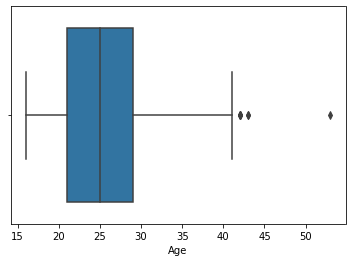

In [156]:
# Checking for outliers using the Box Plot approach

sns.boxplot(df3['Age'])

<AxesSubplot:ylabel='Density'>

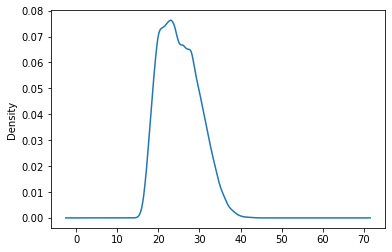

In [157]:
df3.Age.plot(kind = 'density')

In [158]:
# Seperate numeriacl from categorical features

continuous_vars=df3.select_dtypes('float').columns
print(continuous_vars)
categorical_vars=df3.select_dtypes('object').columns
print(categorical_vars)

Index(['Attacking', 'Crossing', 'Finishing', 'hAccuracy', 'Skill', 'Dribbling',
       'Curve', 'FK_Accuracy', 'lPassing', 'bControl', 'Movement',
       'Acceleration', 'sSpeed', 'Agility', 'Reactions', 'Balance', 'Power',
       'sPower', 'Jumping', 'Stamina', 'Strength', 'lShots', 'Mentality',
       'Interceptions', 'Positioning', 'Penalties', 'Composure', 'Defending',
       'Marking', 'sTackle', 'SlidingT', 'Goalkeeping', 'GK_Diving',
       'Gk_Handling', 'GK_Kicking', 'GK_Positioning', 'T_Stats', 'PAC', 'SHO',
       'PAS', 'DRI', 'DEF', 'PHY', 'Hits'],
      dtype='object')
Index([], dtype='object')


In [159]:
df3.describe(include='float')

,Attacking,Crossing,Finishing,hAccuracy,Skill,Dribbling,Curve,FK_Accuracy,lPassing,bControl,...,GK_Kicking,GK_Positioning,T_Stats,PAC,SHO,PAS,DRI,DEF,PHY,Hits
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.00000,18979.000000,18979.000000,16333.000000
mean,248.931446,49.686690,45.841942,51.937745,256.455540,55.586416,47.239734,42.389711,52.723492,58.526244,...,16.076987,16.217368,1595.267043,67.452309,53.454151,57.677030,62.87332,49.862917,64.368215,26.638217
std,74.293703,18.129636,19.564476,17.290372,78.632985,18.760729,18.201536,17.226092,15.177390,16.564826,...,16.490992,17.002229,269.860860,10.676942,13.825200,10.077628,9.92595,16.437843,9.601373,128.825696
min,42.000000,6.000000,3.000000,5.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000,...,2.000000,2.000000,747.000000,25.000000,16.000000,25.000000,25.00000,12.000000,28.000000,1.000000
25%,222.000000,38.000000,30.000000,44.000000,222.000000,49.000000,35.000000,31.000000,43.000000,54.000000,...,8.000000,8.000000,1452.000000,61.000000,44.000000,51.000000,57.00000,35.000000,58.000000,2.000000
50%,263.000000,54.000000,49.000000,55.000000,269.000000,61.000000,49.000000,41.000000,56.000000,63.000000,...,11.000000,11.000000,1627.000000,68.000000,56.000000,58.000000,64.00000,53.000000,65.000000,5.000000
75%,297.000000,63.000000,62.000000,64.000000,310.000000,68.000000,61.000000,55.000000,64.000000,69.000000,...,14.000000,14.000000,1781.000000,75.000000,64.000000,64.000000,69.00000,63.000000,71.000000,15.000000
max,437.000000,94.000000,95.000000,93.000000,470.000000,96.000000,94.000000,94.000000,93.000000,96.000000,...,93.000000,91.000000,2316.000000,96.000000,93.000000,93.000000,95.00000,91.000000,91.000000,8400.000000


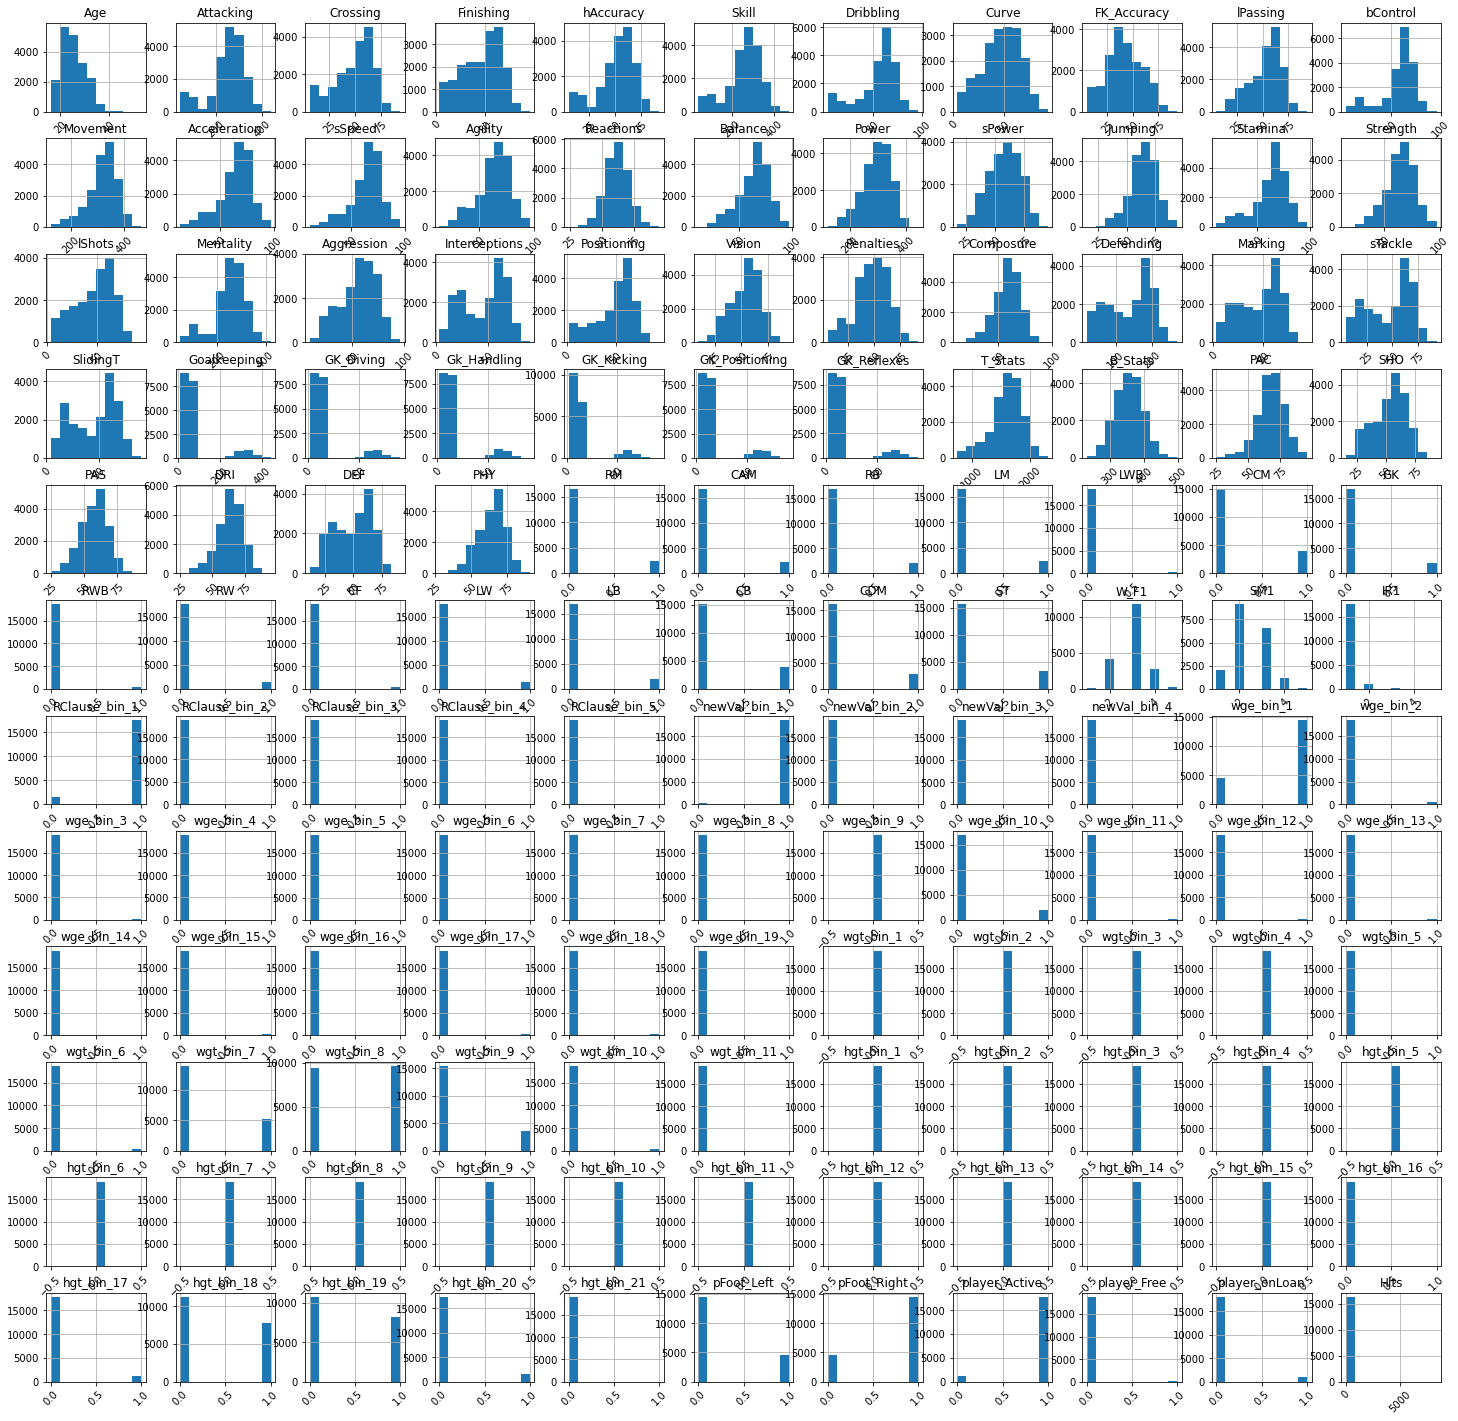

In [160]:
# Visual inspection of the distribution of data in all the numerical features

df3.hist(figsize=(25, 25), xrot=45)
plt.show()

In [161]:
# Selecting a few number of continuous variables to check outliers using the box plot 
continuous_vars=['Attacking', 'Crossing', 'Finishing', 'hAccuracy', 'Skill', 'Dribbling', 'bControl']
print(continuous_vars)

['Attacking', 'Crossing', 'Finishing', 'hAccuracy', 'Skill', 'Dribbling', 'bControl']


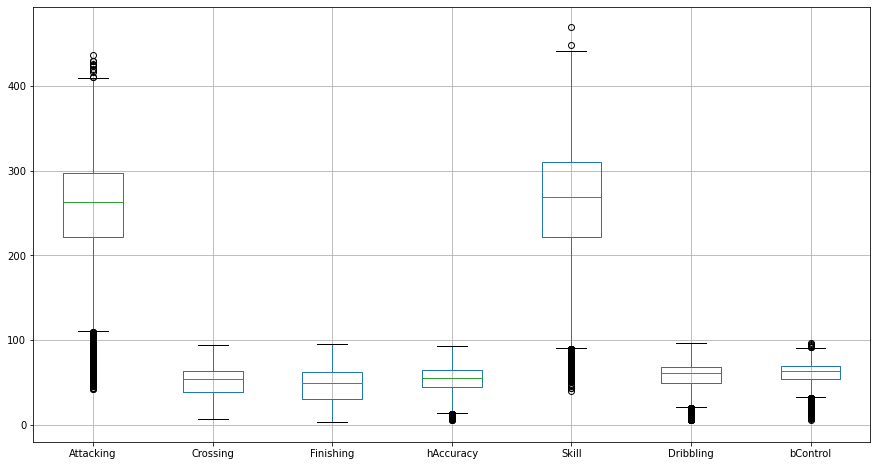

In [162]:
# Box plot for the selected continuous variables  
plt.figure(figsize=(15,8))
df3.boxplot(column=list(continuous_vars))
plt.show()

In [163]:
def outlier_lims(col):
    q3,q1 = np.percentile(col, [75,25])
    iqr = q3-q1
    upper_lim = q3 + 1.5*iqr
    lower_lim = q1 - 1.5*iqr
    return upper_lim, lower_lim

for col in continuous_vars:
    print("--------------------------------------------------")
    print("Column:", col)
    
    UL,LL = outlier_lims(df3[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)
    
    # Total lenght of lower/upper limits for the outliers combined 
    total_outliers = len(df3.loc[df3[col]<LL,col]) + len(df3.loc[df3[col]>UL,col]) 
    
    # Percentage of outliers 
    percent = (total_outliers / len(df3.index) )*100
    
    print("Percentage of Outliers=", percent)
    print("----------------------------------------------")

--------------------------------------------------
Column: Attacking
Upper Limit = 409.5
Lower Limit = 109.5
Percentage of Outliers= 10.622266715843827
----------------------------------------------
--------------------------------------------------
Column: Crossing
Upper Limit = 100.5
Lower Limit = 0.5
Percentage of Outliers= 0.0
----------------------------------------------
--------------------------------------------------
Column: Finishing
Upper Limit = 110.0
Lower Limit = -18.0
Percentage of Outliers= 0.0
----------------------------------------------
--------------------------------------------------
Column: hAccuracy
Upper Limit = 94.0
Lower Limit = 14.0
Percentage of Outliers= 5.838031508509405
----------------------------------------------
--------------------------------------------------
Column: Skill
Upper Limit = 442.0
Lower Limit = 90.0
Percentage of Outliers= 6.496654196743769
----------------------------------------------
-----------------------------------------------

In [164]:
df3.select_dtypes(include='float64').skew() # Checking the skewness level 

Attacking         -1.060083
Crossing          -0.617816
Finishing         -0.343626
hAccuracy         -0.868297
Skill             -0.801229
Dribbling         -1.135206
Curve             -0.261082
FK_Accuracy        0.117621
lPassing          -0.590775
bControl          -1.341859
Movement          -0.794537
Acceleration      -0.862812
sSpeed            -0.880771
Agility           -0.628954
Reactions         -0.111195
Balance           -0.607568
Power             -0.455950
sPower            -0.232136
Jumping           -0.405870
Stamina           -0.900606
Strength          -0.418489
lShots            -0.442029
Mentality         -0.939049
Interceptions     -0.295340
Positioning       -0.786475
Penalties         -0.341212
Composure         -0.441049
Defending         -0.321092
Marking           -0.353345
sTackle           -0.368041
SlidingT          -0.298096
Goalkeeping        2.561164
GK_Diving          2.471018
Gk_Handling        2.461872
GK_Kicking         2.462682
GK_Positioning     2

<AxesSubplot:ylabel='Density'>

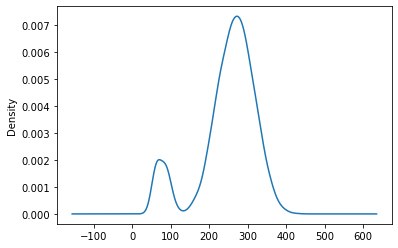

In [165]:
df3['Attacking'].plot(kind='density') # Check for skewness on the 'Attacking' column 

### The column skewed between point 0 and 100: an indication of the presence of outliers  

In [166]:
# Reducing the skewness on the Attacking column using the log transformation approach
df3[['DRI', 'PAC', 'T_Stats', 'GK_Positioning', 'GK_Kicking', 'Gk_Handling', 'GK_Diving', 'Goalkeeping', 'Mentality', 'Stamina', 'Jumping', 'sSpeed', 'Acceleration', 'Movement', 'bControl', 'Dribbling', 'Skill', 'hAccuracy', 'Attacking']] = np.log1p(df3[['DRI', 'PAC', 'T_Stats', 'GK_Positioning', 'GK_Kicking', 'Gk_Handling', 'GK_Diving', 'Goalkeeping', 'Mentality', 'Stamina', 'Jumping', 'sSpeed', 'Acceleration', 'Movement', 'bControl', 'Dribbling', 'Skill', 'hAccuracy', 'Attacking']])

<AxesSubplot:ylabel='Density'>

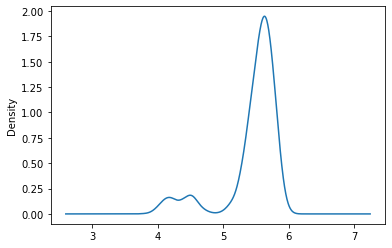

In [167]:
df3['Attacking'].plot(kind='density') # A check if the log transform approach worked 

### Observe that the rise between points 4 and 5 reduced as a result of the log transform technique applied 

In [168]:
df3.select_dtypes(include='float64').skew() # Viewing the skewness level of all the columns 

Attacking         -1.964389
Crossing          -0.617816
Finishing         -0.343626
hAccuracy         -1.834377
Skill             -1.699117
Dribbling         -2.025477
Curve             -0.261082
FK_Accuracy        0.117621
lPassing          -0.590775
bControl          -2.163877
Movement          -1.435342
Acceleration      -1.791780
sSpeed            -1.822163
Agility           -0.628954
Reactions         -0.111195
Balance           -0.607568
Power             -0.455950
sPower            -0.232136
Jumping           -1.091834
Stamina           -1.721921
Strength          -0.418489
lShots            -0.442029
Mentality         -1.829032
Interceptions     -0.295340
Positioning       -0.786475
Penalties         -0.341212
Composure         -0.441049
Defending         -0.321092
Marking           -0.353345
sTackle           -0.368041
SlidingT          -0.298096
Goalkeeping        2.227811
GK_Diving          1.653525
Gk_Handling        1.632411
GK_Kicking         1.608863
GK_Positioning     1

In [169]:
for col in continuous_vars:
    print("--------------------------------------------------")
    print("Column:", col)
    
    UL,LL = outlier_lims(df3[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)
    
    # Total lenght of lower/upper limits for the outliers combined 
    total_outliers = len(df3.loc[df3[col]<LL,col]) + len(df3.loc[df3[col]>UL,col]) 
    
    # Percentage of outliers 
    percent = (total_outliers / len(df3.index) )*100
    
    print("Percentage of Outliers=", percent)
    print("----------------------------------------------")

--------------------------------------------------
Column: Attacking
Upper Limit = 6.131976059073333
Lower Limit = 4.97228919889219
Percentage of Outliers= 11.006902365772696
----------------------------------------------
--------------------------------------------------
Column: Crossing
Upper Limit = 100.5
Lower Limit = 0.5
Percentage of Outliers= 0.0
----------------------------------------------
--------------------------------------------------
Column: Finishing
Upper Limit = 110.0
Lower Limit = -18.0
Percentage of Outliers= 0.0
----------------------------------------------
--------------------------------------------------
Column: hAccuracy
Upper Limit = 4.725974440083613
Lower Limit = 3.255075319582344
Percentage of Outliers= 10.89098477264345
----------------------------------------------
--------------------------------------------------
Column: Skill
Upper Limit = 6.238724623257907
Lower Limit = 4.908240060381447
Percentage of Outliers= 10.906791717161072
-------------------

In [170]:
# Treating outliers using the Inter Quantile Range(IQR) method

outliers = []

def detect_outliers_iqr(df3, threshold=1.5):
    
    df3 = np.asarray(df3)
    quartile_1, quartile_3 = np.percentile(df3, [25, 75])
    iqr = quartile_3 - quartile_1

    lower_bound = quartile_1 - (threshold * iqr)
    upper_bound = quartile_3 + (threshold * iqr)

    outliers = df3[(df3 < lower_bound) | (df3 > upper_bound)]
    return outliers


outliers_iqr = detect_outliers_iqr(df3)

print("Outliers detected:", outliers_iqr)

Outliers detected: []


In [171]:
# Inspecting all columns to see if exists any noise or issues to clean
cols = df3.columns

for col in cols:
    print('Column Name:', col, ',', 'Unique Values:', df3[col].unique())

Column Name: Age , Unique Values: [33 35 27 29 28 31 21 34 32 25 26 30 20 24 22 23 19 38 42 36 37 18 17 39
 40 41 16 43 53]
Column Name: Attacking , Unique Values: [6.06378521 6.08221891 4.56434819 6.01126717 6.01371516 6.04973346
 5.97380961 4.74493213 4.77912349 5.75890177 6.01859321 5.85793315
 4.46590812 4.78749174 6.05678401 5.92692603 6.02102335 5.88887796
 5.79605775 5.95064255 6.00635316 4.82028157 6.04263283 5.4161004
 5.96357934 5.98645201 6.05443935 5.9242558  5.90263333 5.91889385
 5.74300319 5.98393628 5.84643878 5.99146455 5.99396143 4.36944785
 5.63835467 5.80211838 6.00141488 5.94017125 5.94279938 4.55387689
 5.97888576 6.04025471 5.82894562 5.68357977 5.84354442 5.96870756
 4.44265126 5.88610403 5.92157842 5.9348942  5.84932478 5.96614674
 5.95842469 5.73334128 5.62762111 5.94803499 5.91079664 5.99893656
 5.68017261 5.70044357 5.90536185 5.86646806 5.89715387 5.77765232
 5.89164421 4.52178858 5.89989735 5.83481074 5.95583737 5.87493073
 5.7235851  5.77455155 5.57215403

 3.8918203  4.98360662 3.71357207 4.06044301]
Column Name: Dribbling , Unique Values: [4.57471098 4.48863637 2.56494936 4.56434819 4.4543473  4.51085951
 3.33220451 4.53259949 3.09104245 4.26267988 4.52178858 4.24849524
 2.63905733 3.4339872  4.47733681 4.18965474 4.38202663 4.4308168
 3.17805383 4.39444915 2.94443898 4.54329478 4.35670883 4.15888308
 4.34380542 2.83321334 4.09434456 4.40671925 2.48490665 4.44265126
 2.39789527 4.33073334 4.36944785 4.02535169 2.77258872 4.46590812
 4.20469262 4.21950771 3.36729583 4.06044301 4.17438727 4.41884061
 4.14313473 2.99573227 3.98898405 4.29045944 3.93182563 3.29583687
 3.78418963 4.49980967 4.30406509 3.04452244 2.7080502  4.2341065
 4.27666612 4.31748811 3.13549422 4.00733319 4.04305127 4.12713439
 2.30258509 3.21887582 4.11087386 3.25809654 2.19722458 2.89037176
 3.87120101 4.07753744 3.8501476  3.76120012 3.95124372 3.97029191
 3.91202301 3.80666249 3.58351894 3.8918203  3.68887945 3.40119738
 3.71357207 3.8286414  4.03577394 3.55534806 

Column Name: SM1 , Unique Values: [4 5 1 2 3]
Column Name: IR1 , Unique Values: [5 3 4 2 1]
Column Name: RClause_bin_1 , Unique Values: [0 1]
Column Name: RClause_bin_2 , Unique Values: [0 1]
Column Name: RClause_bin_3 , Unique Values: [1 0]
Column Name: RClause_bin_4 , Unique Values: [0 1]
Column Name: RClause_bin_5 , Unique Values: [0 1]
Column Name: newVal_bin_1 , Unique Values: [0 1]
Column Name: newVal_bin_2 , Unique Values: [0 1]
Column Name: newVal_bin_3 , Unique Values: [1 0]
Column Name: newVal_bin_4 , Unique Values: [0 1]
Column Name: wge_bin_1 , Unique Values: [0 1]
Column Name: wge_bin_2 , Unique Values: [0 1]
Column Name: wge_bin_3 , Unique Values: [0 1]
Column Name: wge_bin_4 , Unique Values: [0 1]
Column Name: wge_bin_5 , Unique Values: [0 1]
Column Name: wge_bin_6 , Unique Values: [0 1]
Column Name: wge_bin_7 , Unique Values: [0 1]
Column Name: wge_bin_8 , Unique Values: [0 1]
Column Name: wge_bin_9 , Unique Values: [0]
Column Name: wge_bin_10 , Unique Values: [0 1]
Col

In [172]:
df3_ = df3.copy() # Keeping a record of the recent dataframe "df3" ready for feature preprocessing 

In [173]:
df3_

,Age,Attacking,Crossing,Finishing,hAccuracy,Skill,Dribbling,Curve,FK_Accuracy,lPassing,...,hgt_bin_18,hgt_bin_19,hgt_bin_20,hgt_bin_21,pFoot_Left,pFoot_Right,player_Active,player_Free,player_onLoan,Hits
0,33,6.063785,85.0,95.0,4.262680,6.154858,4.574711,93.0,94.0,91.0,...,0,0,0,0,1,0,1,0,0,771.0
1,35,6.082219,84.0,95.0,4.510860,6.028279,4.488636,81.0,76.0,77.0,...,0,1,0,0,0,1,1,0,0,562.0
2,27,4.564348,13.0,11.0,2.772589,4.700480,2.564949,13.0,14.0,40.0,...,0,1,0,0,0,1,1,0,0,150.0
3,29,6.011267,94.0,82.0,4.025352,6.091310,4.488636,85.0,83.0,93.0,...,0,1,0,0,0,1,1,0,0,207.0
4,28,6.013715,85.0,87.0,4.143135,6.107023,4.564348,88.0,89.0,81.0,...,1,0,0,0,0,1,1,0,0,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,21,4.983607,23.0,26.0,3.784190,4.962845,3.332205,23.0,21.0,29.0,...,1,0,0,0,0,1,1,0,0,NaN
19017,17,5.356586,38.0,42.0,3.713572,5.393628,3.850148,40.0,35.0,50.0,...,1,0,0,0,0,1,1,0,0,NaN
19018,18,5.303305,30.0,34.0,3.784190,5.337538,3.784190,39.0,31.0,47.0,...,1,0,0,0,0,1,1,0,0,NaN
19019,20,5.375278,45.0,52.0,3.555348,5.273000,3.951244,35.0,31.0,31.0,...,1,0,0,0,0,1,1,0,0,NaN


# TASK 2: Preprocessing the cleaned data from task 1 above and transforming it into a well behaved data.

## Handling the numerical data by scaling to a range

In [174]:
# Droping the outcome variable to scale only the input features

df3.drop(['Hits'], axis=1, inplace=True) 

In [175]:
df3

,Age,Attacking,Crossing,Finishing,hAccuracy,Skill,Dribbling,Curve,FK_Accuracy,lPassing,...,hgt_bin_17,hgt_bin_18,hgt_bin_19,hgt_bin_20,hgt_bin_21,pFoot_Left,pFoot_Right,player_Active,player_Free,player_onLoan
0,33,6.063785,85.0,95.0,4.262680,6.154858,4.574711,93.0,94.0,91.0,...,1,0,0,0,0,1,0,1,0,0
1,35,6.082219,84.0,95.0,4.510860,6.028279,4.488636,81.0,76.0,77.0,...,0,0,1,0,0,0,1,1,0,0
2,27,4.564348,13.0,11.0,2.772589,4.700480,2.564949,13.0,14.0,40.0,...,0,0,1,0,0,0,1,1,0,0
3,29,6.011267,94.0,82.0,4.025352,6.091310,4.488636,85.0,83.0,93.0,...,0,0,1,0,0,0,1,1,0,0
4,28,6.013715,85.0,87.0,4.143135,6.107023,4.564348,88.0,89.0,81.0,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,21,4.983607,23.0,26.0,3.784190,4.962845,3.332205,23.0,21.0,29.0,...,0,1,0,0,0,0,1,1,0,0
19017,17,5.356586,38.0,42.0,3.713572,5.393628,3.850148,40.0,35.0,50.0,...,0,1,0,0,0,0,1,1,0,0
19018,18,5.303305,30.0,34.0,3.784190,5.337538,3.784190,39.0,31.0,47.0,...,0,1,0,0,0,0,1,1,0,0
19019,20,5.375278,45.0,52.0,3.555348,5.273000,3.951244,35.0,31.0,31.0,...,0,1,0,0,0,0,1,1,0,0


### The minMaxScaler 

In [176]:

from sklearn.preprocessing import MinMaxScaler

df_3 = pd.DataFrame(df3)

scaler = MinMaxScaler()

sData = scaler.fit_transform(df_3) 

scaledDF = pd.DataFrame(sData, columns = df_3.columns)


In [177]:
scaledDF

,Age,Attacking,Crossing,Finishing,hAccuracy,Skill,Dribbling,Curve,FK_Accuracy,lPassing,...,hgt_bin_17,hgt_bin_18,hgt_bin_19,hgt_bin_20,hgt_bin_21,pFoot_Left,pFoot_Right,player_Active,player_Free,player_onLoan
0,0.459459,0.992058,0.897727,1.000000,0.898015,1.000000,1.000000,0.988889,1.000000,0.977273,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.513514,1.000000,0.886364,1.000000,0.988212,0.948150,0.969071,0.855556,0.797753,0.818182,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.297297,0.346033,0.079545,0.086957,0.356466,0.404258,0.277831,0.100000,0.101124,0.397727,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.351351,0.969431,1.000000,0.858696,0.811762,0.973969,0.969071,0.900000,0.876404,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.324324,0.970485,0.897727,0.913043,0.854568,0.980406,0.996276,0.933333,0.943820,0.863636,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,0.135135,0.526668,0.193182,0.250000,0.724116,0.511727,0.553529,0.211111,0.179775,0.272727,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
18975,0.027027,0.687365,0.363636,0.423913,0.698451,0.688185,0.739642,0.400000,0.337079,0.511364,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
18976,0.054054,0.664409,0.272727,0.336957,0.724116,0.665209,0.715941,0.388889,0.292135,0.477273,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
18977,0.108108,0.695418,0.443182,0.532609,0.640947,0.638773,0.775969,0.344444,0.292135,0.295455,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Retaining the Hits Column Preparatory for Feature Selection 

In [178]:
Hit_ = df3_.Hits # Assigning the hits column to "Hit_" in order to add it back to the df2 dataframe

In [179]:
Hit_

0        771.0
1        562.0
2        150.0
3        207.0
4        595.0
         ...  
19016      NaN
19017      NaN
19018      NaN
19019      NaN
19020      NaN
Name: Hits, Length: 18979, dtype: float64

In [180]:
scaledDF['Hits'] =  Hit_ # Adding back the Hits column to the sccaledDF dataframe for feature selection 

In [181]:
scaledDF

,Age,Attacking,Crossing,Finishing,hAccuracy,Skill,Dribbling,Curve,FK_Accuracy,lPassing,...,hgt_bin_18,hgt_bin_19,hgt_bin_20,hgt_bin_21,pFoot_Left,pFoot_Right,player_Active,player_Free,player_onLoan,Hits
0,0.459459,0.992058,0.897727,1.000000,0.898015,1.000000,1.000000,0.988889,1.000000,0.977273,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,771.0
1,0.513514,1.000000,0.886364,1.000000,0.988212,0.948150,0.969071,0.855556,0.797753,0.818182,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,562.0
2,0.297297,0.346033,0.079545,0.086957,0.356466,0.404258,0.277831,0.100000,0.101124,0.397727,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,150.0
3,0.351351,0.969431,1.000000,0.858696,0.811762,0.973969,0.969071,0.900000,0.876404,1.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,207.0
4,0.324324,0.970485,0.897727,0.913043,0.854568,0.980406,0.996276,0.933333,0.943820,0.863636,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,0.135135,0.526668,0.193182,0.250000,0.724116,0.511727,0.553529,0.211111,0.179775,0.272727,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN
18975,0.027027,0.687365,0.363636,0.423913,0.698451,0.688185,0.739642,0.400000,0.337079,0.511364,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN
18976,0.054054,0.664409,0.272727,0.336957,0.724116,0.665209,0.715941,0.388889,0.292135,0.477273,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN
18977,0.108108,0.695418,0.443182,0.532609,0.640947,0.638773,0.775969,0.344444,0.292135,0.295455,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN


# Separating the scaledDF dataframe into missing values and non-missing values on Hits (the outcome column)

In [182]:

# Separating the scaledDF dataframe based on missing values and non-missing values

# Fetch rows where 'Hits_column' has missing values
rows_with_missing_values = scaledDF[scaledDF['Hits'].isnull()]

# Separate rows with non-missing values in 'Hits_column'
df_without_missing_values = scaledDF[scaledDF['Hits'].notnull()]

In [183]:
rows_with_missing_values

,Age,Attacking,Crossing,Finishing,hAccuracy,Skill,Dribbling,Curve,FK_Accuracy,lPassing,...,hgt_bin_18,hgt_bin_19,hgt_bin_20,hgt_bin_21,pFoot_Left,pFoot_Right,player_Active,player_Free,player_onLoan,Hits
11790,0.351351,0.822346,0.511364,0.652174,0.876941,0.764416,0.839172,0.400000,0.393258,0.613636,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN
11791,0.243243,0.810294,0.704545,0.554348,0.740271,0.813863,0.856151,0.644444,0.550562,0.579545,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
11792,0.486486,0.828248,0.693182,0.630435,0.740271,0.824678,0.877610,0.655556,0.471910,0.647727,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN
11793,0.459459,0.786744,0.522727,0.543478,0.724116,0.829981,0.877610,0.722222,0.550562,0.545455,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN
11794,0.135135,0.657930,0.318182,0.195652,0.860292,0.625971,0.633712,0.300000,0.258427,0.375000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,0.135135,0.526668,0.193182,0.250000,0.724116,0.511727,0.553529,0.211111,0.179775,0.272727,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN
18975,0.027027,0.687365,0.363636,0.423913,0.698451,0.688185,0.739642,0.400000,0.337079,0.511364,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN
18976,0.054054,0.664409,0.272727,0.336957,0.724116,0.665209,0.715941,0.388889,0.292135,0.477273,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN
18977,0.108108,0.695418,0.443182,0.532609,0.640947,0.638773,0.775969,0.344444,0.292135,0.295455,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN


In [184]:
df_without_missing_values

,Age,Attacking,Crossing,Finishing,hAccuracy,Skill,Dribbling,Curve,FK_Accuracy,lPassing,...,hgt_bin_18,hgt_bin_19,hgt_bin_20,hgt_bin_21,pFoot_Left,pFoot_Right,player_Active,player_Free,player_onLoan,Hits
0,0.459459,0.992058,0.897727,1.000000,0.898015,1.000000,1.000000,0.988889,1.000000,0.977273,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,771.0
1,0.513514,1.000000,0.886364,1.000000,0.988212,0.948150,0.969071,0.855556,0.797753,0.818182,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,562.0
2,0.297297,0.346033,0.079545,0.086957,0.356466,0.404258,0.277831,0.100000,0.101124,0.397727,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,150.0
3,0.351351,0.969431,1.000000,0.858696,0.811762,0.973969,0.969071,0.900000,0.876404,1.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,207.0
4,0.324324,0.970485,0.897727,0.913043,0.854568,0.980406,0.996276,0.933333,0.943820,0.863636,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,0.270270,0.685328,0.590909,0.347826,0.770575,0.665209,0.782814,0.366667,0.280899,0.363636,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0
16380,0.108108,0.776952,0.579545,0.500000,0.740271,0.759752,0.856151,0.455556,0.393258,0.511364,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
16381,0.081081,0.651352,0.375000,0.239130,0.791752,0.610512,0.681694,0.244444,0.269663,0.420455,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0
16382,0.135135,0.128927,0.079545,0.054348,0.251913,0.268660,0.304460,0.066667,0.089888,0.238636,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0


In [185]:
newDF_ = pd.DataFrame(df_without_missing_values)

In [186]:
newDF_

,Age,Attacking,Crossing,Finishing,hAccuracy,Skill,Dribbling,Curve,FK_Accuracy,lPassing,...,hgt_bin_18,hgt_bin_19,hgt_bin_20,hgt_bin_21,pFoot_Left,pFoot_Right,player_Active,player_Free,player_onLoan,Hits
0,0.459459,0.992058,0.897727,1.000000,0.898015,1.000000,1.000000,0.988889,1.000000,0.977273,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,771.0
1,0.513514,1.000000,0.886364,1.000000,0.988212,0.948150,0.969071,0.855556,0.797753,0.818182,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,562.0
2,0.297297,0.346033,0.079545,0.086957,0.356466,0.404258,0.277831,0.100000,0.101124,0.397727,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,150.0
3,0.351351,0.969431,1.000000,0.858696,0.811762,0.973969,0.969071,0.900000,0.876404,1.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,207.0
4,0.324324,0.970485,0.897727,0.913043,0.854568,0.980406,0.996276,0.933333,0.943820,0.863636,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,0.270270,0.685328,0.590909,0.347826,0.770575,0.665209,0.782814,0.366667,0.280899,0.363636,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0
16380,0.108108,0.776952,0.579545,0.500000,0.740271,0.759752,0.856151,0.455556,0.393258,0.511364,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
16381,0.081081,0.651352,0.375000,0.239130,0.791752,0.610512,0.681694,0.244444,0.269663,0.420455,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0
16382,0.135135,0.128927,0.079545,0.054348,0.251913,0.268660,0.304460,0.066667,0.089888,0.238636,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0


In [187]:
newDF_.isna().sum() # Confirmed; no missing values exists again 

Age              0
Attacking        0
Crossing         0
Finishing        0
hAccuracy        0
                ..
pFoot_Right      0
player_Active    0
player_Free      0
player_onLoan    0
Hits             0
Length: 132, dtype: int64

In [188]:
newDF_.shape # The data contains 16333 rows and 132 columns 

(16333, 132)

In [189]:
newDF_.info(20) # Viewing column names and their data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16333 entries, 0 to 16383
Data columns (total 132 columns):
 #    Column          Dtype  
---   ------          -----  
 0    Age             float64
 1    Attacking       float64
 2    Crossing        float64
 3    Finishing       float64
 4    hAccuracy       float64
 5    Skill           float64
 6    Dribbling       float64
 7    Curve           float64
 8    FK_Accuracy     float64
 9    lPassing        float64
 10   bControl        float64
 11   Movement        float64
 12   Acceleration    float64
 13   sSpeed          float64
 14   Agility         float64
 15   Reactions       float64
 16   Balance         float64
 17   Power           float64
 18   sPower          float64
 19   Jumping         float64
 20   Stamina         float64
 21   Strength        float64
 22   lShots          float64
 23   Mentality       float64
 24   Aggression      float64
 25   Interceptions   float64
 26   Positioning     float64
 27   Vision        

# Dividing the preprocessed data into two equal parts to be able to carryout feature selection on my system

In [190]:
mDF = pd.DataFrame(newDF_)

In [191]:
total_rows = len(mDF) # Check for total number of rows 

In [192]:
total_rows

16333

In [193]:
halfRows = total_rows // 2 # Finding half of the total number of rows 

In [194]:
halfRows

8166

In [195]:
P1_df = mDF.iloc[:halfRows] # Extracting all columns from row 0 to the half of the entire rows 

In [196]:
P1_df # The resulting dataframe assigned to part1_df

,Age,Attacking,Crossing,Finishing,hAccuracy,Skill,Dribbling,Curve,FK_Accuracy,lPassing,...,hgt_bin_18,hgt_bin_19,hgt_bin_20,hgt_bin_21,pFoot_Left,pFoot_Right,player_Active,player_Free,player_onLoan,Hits
0,0.459459,0.992058,0.897727,1.000000,0.898015,1.000000,1.000000,0.988889,1.000000,0.977273,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,771.0
1,0.513514,1.000000,0.886364,1.000000,0.988212,0.948150,0.969071,0.855556,0.797753,0.818182,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,562.0
2,0.297297,0.346033,0.079545,0.086957,0.356466,0.404258,0.277831,0.100000,0.101124,0.397727,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,150.0
3,0.351351,0.969431,1.000000,0.858696,0.811762,0.973969,0.969071,0.900000,0.876404,1.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,207.0
4,0.324324,0.970485,0.897727,0.913043,0.854568,0.980406,0.996276,0.933333,0.943820,0.863636,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8161,0.297297,0.879320,0.636364,0.728261,0.871475,0.845489,0.872365,0.700000,0.640449,0.613636,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,28.0
8162,0.270270,0.354916,0.147727,0.173913,0.307936,0.331062,0.414193,0.144444,0.168539,0.170455,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0
8163,0.216216,0.754939,0.465909,0.413043,0.865927,0.725529,0.768992,0.288889,0.280899,0.681818,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0
8164,0.324324,0.831169,0.681818,0.532609,0.865927,0.840385,0.867041,0.677778,0.573034,0.670455,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [197]:
P2_df = mDF.iloc[halfRows:] # Extracting all columns beggining from the middle of the rows to the end 

In [198]:
P2_df # The resulting dataframe assigned to part2_df

,Age,Attacking,Crossing,Finishing,hAccuracy,Skill,Dribbling,Curve,FK_Accuracy,lPassing,...,hgt_bin_18,hgt_bin_19,hgt_bin_20,hgt_bin_21,pFoot_Left,pFoot_Right,player_Active,player_Free,player_onLoan,Hits
8166,0.432432,0.714917,0.306818,0.195652,0.917934,0.630283,0.653680,0.355556,0.303371,0.329545,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0
8167,0.513514,0.823829,0.693182,0.467391,0.848753,0.833913,0.861637,0.700000,0.629213,0.579545,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0
8168,0.432432,0.816362,0.727273,0.586957,0.791752,0.856746,0.887878,0.688889,0.640449,0.659091,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0
8169,0.486486,0.742604,0.613636,0.239130,0.854568,0.795654,0.833329,0.588889,0.494382,0.602273,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
8170,0.486486,0.878016,0.704545,0.673913,0.898015,0.844219,0.872365,0.655556,0.606742,0.659091,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,0.270270,0.685328,0.590909,0.347826,0.770575,0.665209,0.782814,0.366667,0.280899,0.363636,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0
16380,0.108108,0.776952,0.579545,0.500000,0.740271,0.759752,0.856151,0.455556,0.393258,0.511364,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
16381,0.081081,0.651352,0.375000,0.239130,0.791752,0.610512,0.681694,0.244444,0.269663,0.420455,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0
16382,0.135135,0.128927,0.079545,0.054348,0.251913,0.268660,0.304460,0.066667,0.089888,0.238636,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0


In [199]:
P2DF = P2_df.copy() # Keeping track off dataframe 

In [200]:
P2DF

,Age,Attacking,Crossing,Finishing,hAccuracy,Skill,Dribbling,Curve,FK_Accuracy,lPassing,...,hgt_bin_18,hgt_bin_19,hgt_bin_20,hgt_bin_21,pFoot_Left,pFoot_Right,player_Active,player_Free,player_onLoan,Hits
8166,0.432432,0.714917,0.306818,0.195652,0.917934,0.630283,0.653680,0.355556,0.303371,0.329545,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0
8167,0.513514,0.823829,0.693182,0.467391,0.848753,0.833913,0.861637,0.700000,0.629213,0.579545,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0
8168,0.432432,0.816362,0.727273,0.586957,0.791752,0.856746,0.887878,0.688889,0.640449,0.659091,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0
8169,0.486486,0.742604,0.613636,0.239130,0.854568,0.795654,0.833329,0.588889,0.494382,0.602273,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
8170,0.486486,0.878016,0.704545,0.673913,0.898015,0.844219,0.872365,0.655556,0.606742,0.659091,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,0.270270,0.685328,0.590909,0.347826,0.770575,0.665209,0.782814,0.366667,0.280899,0.363636,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0
16380,0.108108,0.776952,0.579545,0.500000,0.740271,0.759752,0.856151,0.455556,0.393258,0.511364,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
16381,0.081081,0.651352,0.375000,0.239130,0.791752,0.610512,0.681694,0.244444,0.269663,0.420455,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0
16382,0.135135,0.128927,0.079545,0.054348,0.251913,0.268660,0.304460,0.066667,0.089888,0.238636,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0


### Selecting the Best Features using Recursive Feature Elimination (RFE) and Random Forest Classifier 


In [201]:
# Selecting features 
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier  # Random forest seems to be faster than logistic regression 

# loading data from half of the entire preprocessed newDF dataframe
target = P2DF.Hits.values 
features = P2DF.values[:, 0:-1]

# feature extraction
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select = 65) # 65 is very close to half of the 131 features of the preprocessed data
fit = rfe.fit(features, target)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 65
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True False  True False False False False False False
 False  True False  True  True False  True False False False False False
 False False False  True False False False False False False False False
  True False False False False False False False False False False False
 False False False False  True  True  True False False False False False
 False False False False False False False False False False False False
 False False  True  True False False  True  True False False False]
Feature Ranking: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1

In [202]:
# Model performance on all the 131 features 
X = features
Y = target
model.fit(X, Y)
Score = model.score(X, Y)
Score

1.0

In [203]:
# A for loop extracting the high ranked features 

rankList = P2DF.columns.tolist()
bestRank = []

for col, score in zip(rankList, list(fit.ranking_)):
    if score == 1:
        bestRank.append(col)

In [204]:
bestRank # The resulting best features 

['Age',
 'Attacking',
 'Crossing',
 'Finishing',
 'hAccuracy',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'lPassing',
 'bControl',
 'Movement',
 'Acceleration',
 'sSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'sPower',
 'Jumping',
 'Stamina',
 'Strength',
 'lShots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'sTackle',
 'SlidingT',
 'Goalkeeping',
 'GK_Diving',
 'Gk_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'T_Stats',
 'B_Stats',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'RM',
 'RB',
 'LM',
 'CM',
 'CDM',
 'W_F1',
 'SM1',
 'RClause_bin_1',
 'wge_bin_1',
 'wge_bin_10',
 'wgt_bin_7',
 'wgt_bin_8',
 'wgt_bin_9',
 'hgt_bin_18',
 'hgt_bin_19',
 'pFoot_Left',
 'pFoot_Right']

In [205]:
sub_df = P2DF[bestRank].copy()

### **Selected Best Features DataFrame**

In [206]:
sub_df

,Age,Attacking,Crossing,Finishing,hAccuracy,Skill,Dribbling,Curve,FK_Accuracy,lPassing,...,RClause_bin_1,wge_bin_1,wge_bin_10,wgt_bin_7,wgt_bin_8,wgt_bin_9,hgt_bin_18,hgt_bin_19,pFoot_Left,pFoot_Right
8166,0.432432,0.714917,0.306818,0.195652,0.917934,0.630283,0.653680,0.355556,0.303371,0.329545,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8167,0.513514,0.823829,0.693182,0.467391,0.848753,0.833913,0.861637,0.700000,0.629213,0.579545,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8168,0.432432,0.816362,0.727273,0.586957,0.791752,0.856746,0.887878,0.688889,0.640449,0.659091,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8169,0.486486,0.742604,0.613636,0.239130,0.854568,0.795654,0.833329,0.588889,0.494382,0.602273,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
8170,0.486486,0.878016,0.704545,0.673913,0.898015,0.844219,0.872365,0.655556,0.606742,0.659091,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,0.270270,0.685328,0.590909,0.347826,0.770575,0.665209,0.782814,0.366667,0.280899,0.363636,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
16380,0.108108,0.776952,0.579545,0.500000,0.740271,0.759752,0.856151,0.455556,0.393258,0.511364,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
16381,0.081081,0.651352,0.375000,0.239130,0.791752,0.610512,0.681694,0.244444,0.269663,0.420455,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
16382,0.135135,0.128927,0.079545,0.054348,0.251913,0.268660,0.304460,0.066667,0.089888,0.238636,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [214]:
# Model performance on selected 65 features 
Xi = sub_df.values
Yi = P2DF.Hits
model.fit(Xi, Yi)
Score = model.score(Xi, Yi)
Score

1.0

# **End of Tasks 1, 2 and 3**

# The Bonus Section 

In [207]:
# Containers for saving models performances 

Acc_Train_Data = []
model = []

Acc_Test_Data = []
f1scores = []

# Dataset Splitting 

In [209]:
from sklearn.model_selection import train_test_split

features = sub_df.values
target = P2DF.Hits
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target, test_size = 0.2, random_state = 42)

print(f"Train Data: {Xtrain.shape}, {Ytrain.shape}")
print(f"Test Data: {Xtest.shape}, {Ytest.shape}")

Train Data: (6533, 65), (6533,)
Test Data: (1634, 65), (1634,)


# Modelling the Classification Algorithms

## Deecision Tree (DT)

## Logistic Regression (LR)

## Random Forest (RF)

# **Decision Tree Algorithm**


DT Accuracy =:  13.892288861689106
              precision    recall  f1-score   support

         1.0       0.25      0.25      0.25       364
         2.0       0.22      0.20      0.21       327
         3.0       0.18      0.19      0.19       212
         4.0       0.11      0.11      0.11       152
         5.0       0.03      0.03      0.03        89
         6.0       0.07      0.06      0.07        80
         7.0       0.02      0.02      0.02        46
         8.0       0.02      0.02      0.02        56
         9.0       0.03      0.02      0.02        42
        10.0       0.00      0.00      0.00        15
        11.0       0.00      0.00      0.00        13
        12.0       0.00      0.00      0.00        12
        13.0       0.00      0.00      0.00        28
        14.0       0.00      0.00      0.00        12
        15.0       0.00      0.00      0.00        14
        16.0       0.00      0.00      0.00        15
        17.0       0.00      0.00      0.00  

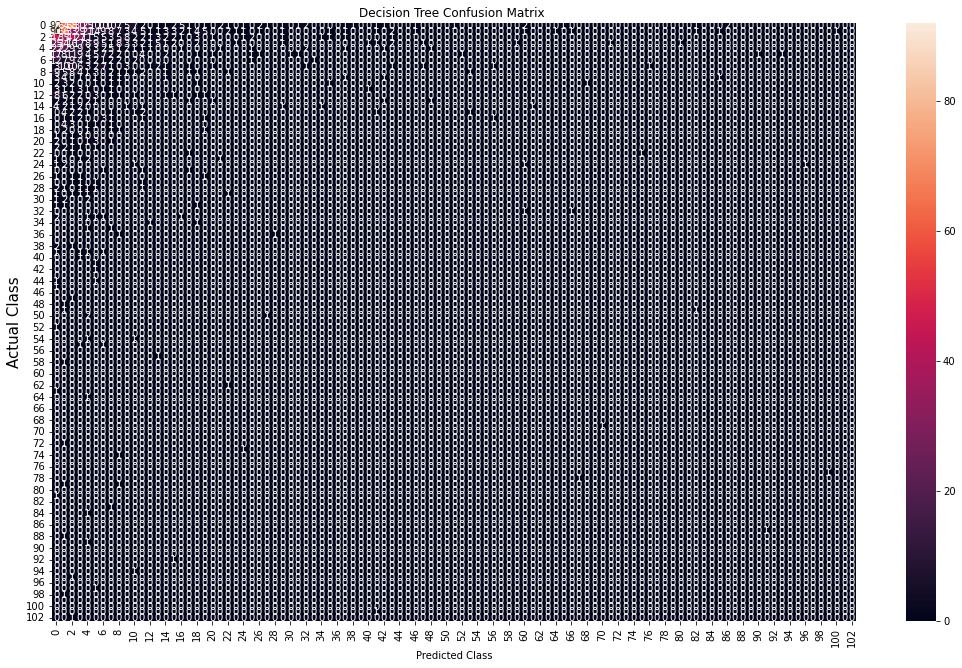

In [210]:
DTree = DecisionTreeClassifier()

DTree.fit(Xtrain, Ytrain)


# Decision Tree Accuray 
model_prediction = DTree.predict(Xtest)
Accuracy = metrics.accuracy_score(Ytest, model_prediction)
Acc_Test_Data.append(Accuracy)
model.append('Decision Tree')

print()

print("DT Accuracy =: ", Accuracy*100)
print(classification_report(Ytest, model_prediction))

# Decision Tree Confusion matrix 

plt.figure(figsize = (18,11))
sns.heatmap(confusion_matrix(Ytest, model_prediction), annot = True)

plt.title("Decision Tree Confusion Matrix ")



plt.xlabel('Predicted Class', fontsize = 10)
plt.ylabel('Actual Class', fontsize = 15)
plt.show()

# **Cross validation score (Decision Tree)**

In [211]:
score = cross_val_score(DTree, features, target, cv=5)
score

array([0.13402693, 0.12117503, 0.11941212, 0.11941212, 0.14268218])

In [212]:
#Print Train Accuracy
DT_train_accuracy = DTree.score(Xtrain, Ytrain)
print("Training accuracy = ", DTree.score(Xtrain, Ytrain))


#Print Test Accuracy
DT_test_accuracy = DTree.score(Xtest, Ytest)
print("Testing accuracy = ",DTree.score(Xtest, Ytest))

Training accuracy =  1.0
Testing accuracy =  0.13892288861689106


# **Saving The Trained Decision Tree Algorithm**

In [213]:

# Saving the trained Decision Tree classifier using Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# **Logistic Regression**

LR Accuracy =:  20.807833537331703
              precision    recall  f1-score   support

         1.0       0.22      0.66      0.33       364
         2.0       0.20      0.28      0.23       327
         3.0       0.06      0.02      0.03       212
         4.0       0.14      0.03      0.04       152
         5.0       0.00      0.00      0.00        89
         6.0       0.00      0.00      0.00        80
         7.0       0.00      0.00      0.00        46
         8.0       0.00      0.00      0.00        56
         9.0       0.00      0.00      0.00        42
        10.0       0.00      0.00      0.00        15
        11.0       0.00      0.00      0.00        13
        12.0       0.00      0.00      0.00        12
        13.0       0.00      0.00      0.00        28
        14.0       0.00      0.00      0.00        12
        15.0       0.00      0.00      0.00        14
        16.0       0.00      0.00      0.00        15
        17.0       0.00      0.00      0.00   

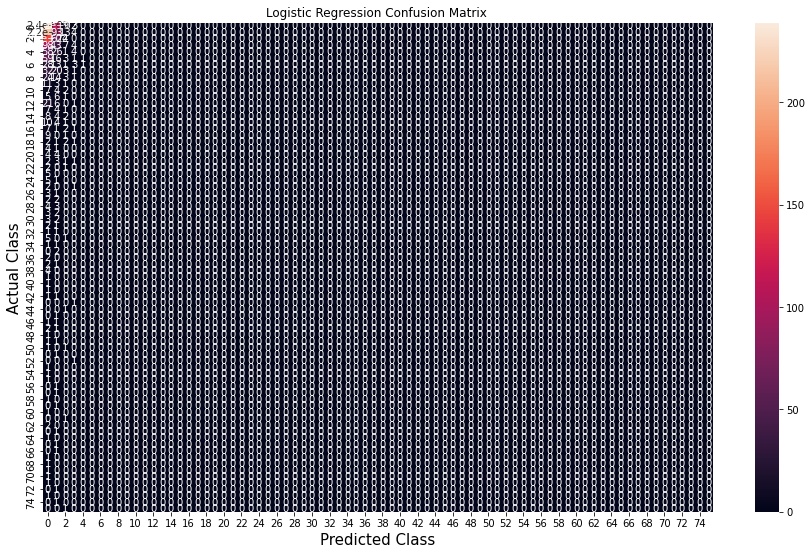

In [214]:
LogReg = LogisticRegression(random_state=42)

LogReg.fit(Xtrain, Ytrain)

# Logistic Regression Accuray 
model_prediction = LogReg.predict(Xtest)
Accuracy = metrics.accuracy_score(Ytest, model_prediction)
Acc_Test_Data.append(Accuracy)
model.append('Logistic Regression')

print("LR Accuracy =: ", Accuracy*100)
print(classification_report(Ytest, model_prediction))

# Logistic Regression Confusion matrix
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(Ytest, model_prediction), annot = True)
plt.title("Logistic Regression Confusion Matrix ")
plt.xlabel('Predicted Class', fontsize = 15)
plt.ylabel('Actual Class', fontsize = 15)
plt.show()

# **Cross validation score (Logistic Regression)**

In [215]:
score = cross_val_score(LogReg, features, target,cv=5)
score

array([0.20930233, 0.20930233, 0.22657685, 0.22045315, 0.22902633])

In [216]:
#Print Train Accuracy
LR_train_accuracy = LogReg.score(Xtrain, Ytrain)
print("Training accuracy = ", LogReg.score(Xtrain, Ytrain))


#Print Test Accuracy
LR_test_accuracy = LogReg.score(Xtest, Ytest)
print("Testing accuracy = ", LogReg.score(Xtest, Ytest))

Training accuracy =  0.24184907393234348
Testing accuracy =  0.20807833537331702


# **Saving trained Logistic Regression model**

In [217]:
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# **Random Forest**

RF Accuracy =:  20.379436964504283
              precision    recall  f1-score   support

         1.0       0.23      0.52      0.32       364
         2.0       0.20      0.32      0.25       327
         3.0       0.14      0.12      0.13       212
         4.0       0.18      0.07      0.10       152
         5.0       0.08      0.02      0.04        89
         6.0       0.11      0.01      0.02        80
         7.0       0.00      0.00      0.00        46
         8.0       0.00      0.00      0.00        56
         9.0       0.00      0.00      0.00        42
        10.0       0.00      0.00      0.00        15
        11.0       0.00      0.00      0.00        13
        12.0       0.00      0.00      0.00        12
        13.0       0.00      0.00      0.00        28
        14.0       0.00      0.00      0.00        12
        15.0       0.00      0.00      0.00        14
        16.0       0.00      0.00      0.00        15
        17.0       0.00      0.00      0.00   

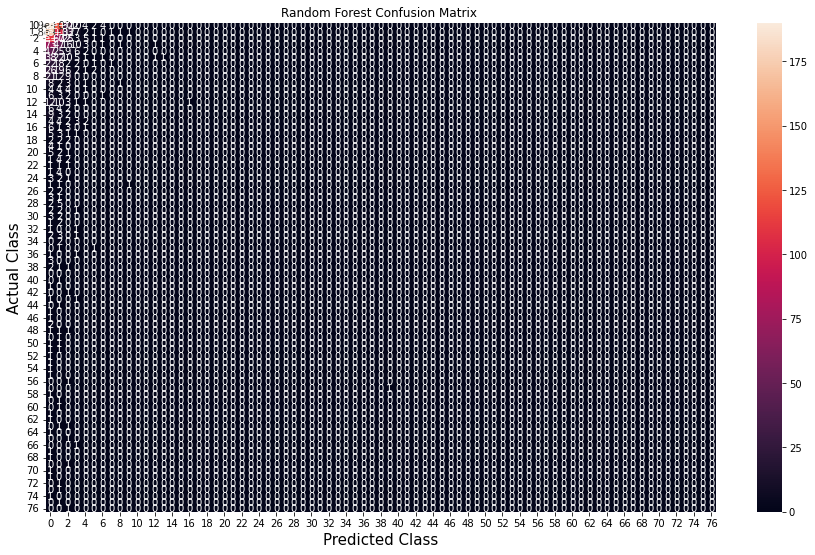

In [218]:
RF = RandomForestClassifier(n_estimators=20, random_state=42)
RF.fit(Xtrain, Ytrain)

# Random Forest  Accuray 
model_prediction = RF.predict(Xtest)
Accuracy = metrics.accuracy_score(Ytest, model_prediction)
Acc_Test_Data.append(Accuracy)
model.append('Random Forest')

print("RF Accuracy =: ", Accuracy*100)
print(classification_report(Ytest, model_prediction))

# Random Forest Confusion matrix
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(Ytest, model_prediction), annot = True)
plt.title("Random Forest Confusion Matrix ")
plt.xlabel('Predicted Class', fontsize = 15)
plt.ylabel('Actual Class', fontsize = 15)
plt.show()

# **Cross validation score (Random Forest)**

In [219]:
score = cross_val_score(RF, features, target,cv=5)
score

array([0.19155447, 0.20685435, 0.21800367, 0.22045315, 0.23086344])

In [220]:
#Print Train Accuracy
RF_train_accuracy = RF.score(Xtrain, Ytrain)
print("Training accuracy = ",RF.score(Xtrain, Ytrain))


#Print Test Accuracy
RF_test_accuracy = RF.score(Xtest, Ytest)
print("Testing accuracy = ",RF.score(Xtest, Ytest))

Training accuracy =  0.9995407928975968
Testing accuracy =  0.20379436964504283


# **Saving trained Random Forest model**

In [221]:
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# **Accuracy Comparison**

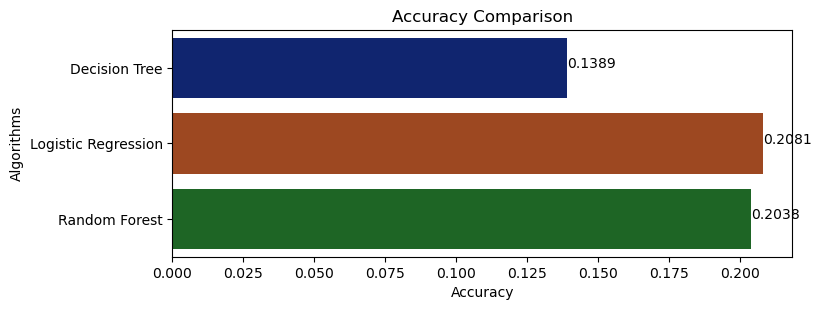

In [222]:
plt.figure(figsize=[8, 3], dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x = Acc_Test_Data, y = model, palette='dark')
for index, value in enumerate(Acc_Test_Data):
    plt.text(value, index, str(round(value, 4)))

In [223]:
accuracy_models = dict(zip(model, Acc_Test_Data))
for m, a in accuracy_models.items():
    print()
    print (m, '-->', a)


Decision Tree --> 0.13892288861689106

Logistic Regression --> 0.20807833537331702

Random Forest --> 0.20379436964504283


#### **Many thanks for this wonderful training Prof. May God bless and reward you abundantly.**